# Projeto de Análise de Dados - Setor Farmacêutico (Pharma_Hype)

## 1. Introdução
- Contextualização do setor farmacêutico.  
- Objetivo: realizar análise exploratória, tratamento de dados e gerar insights de negócios.  
- Ferramentas utilizadas: Python (Pandas, NumPy, Matplotlib), Jupyter Notebook

In [1]:
import pandas as pd
%matplotlib inline
dfprodutos = pd.read_excel('dados_farmaceuticos_hypera.xlsx', sheet_name='produtos')
dfclientes = pd.read_excel('dados_farmaceuticos_hypera.xlsx', sheet_name='clientes')
dfrepresentantes = pd.read_excel('dados_farmaceuticos_hypera.xlsx', sheet_name='representantes')
dfvendas = pd.read_excel('dados_farmaceuticos_hypera.xlsx', sheet_name='vendas')
dfpag = pd.read_excel('dados_farmaceuticos_hypera.xlsx', sheet_name='pagamentos')

In [2]:
pd.set_option('display.max_columns', 38)


## 2. Análise Preliminar
### 2.1 Data Cleaning
- Verificação de dados nulos.  
- Detecção de outliers.  
- Análise da distribuição de valores monetários. Análise Preliminar

In [3]:
dfclientes.sample(10)

,cliente_id,nome_cliente,tipo_cliente,regiao,uf,canal
40,41,Rede Bem+Saúde,Rede de Farmácias,Centro-Oeste,MS,Varejo
107,108,Hospital Esperança,Hospital,Centro-Oeste,GO,Hospitalar
166,167,Rede Popular,Rede de Farmácias,Norte,PA,Distribuidor
214,215,Farmácia Esperança,Farmácia Independente,Sul,SC,Distribuidor
47,48,Farmácia Esperança,Farmácia Independente,Sul,RS,Hospitalar
118,119,Farmácia São José,Farmácia Independente,Norte,AP,Varejo
124,125,Farmácia Do Povo,Farmácia Independente,Nordeste,CE,Varejo
54,55,Farmácia Modelo,Farmácia Independente,Sul,RS,Varejo
11,12,Rede Popular,Rede de Farmácias,Nordeste,PE,Varejo
111,112,Rede MaxFarma,Rede de Farmácias,Nordeste,RN,Varejo


In [4]:
dfclientes.isnull().sum()

cliente_id      0
nome_cliente    0
tipo_cliente    0
regiao          0
uf              0
canal           0
dtype: int64

In [5]:
#Observação: Não possuo dados nulos 

In [6]:
dfclientes[dfclientes.isnull().T.any()]

,cliente_id,nome_cliente,tipo_cliente,regiao,uf,canal


In [7]:
dfprodutos.describe()

,produto_id,preco_base
count,60.000000,60.000000
mean,30.500000,103.672167
std,17.464249,43.302639
min,1.000000,17.280000
25%,15.750000,71.680000
50%,30.500000,109.200000
75%,45.250000,132.127500
max,60.000000,177.800000


In [8]:
dfvendas.describe()

,venda_id,data,cliente_id,produto_id,rep_id,qtd,preco_unit,desconto,receita_bruta,receita_liquida
count,25000.000000,25000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,12500.500000,2024-07-02 03:35:08.160000256,110.436120,30.346600,13.023360,11.485440,103.190142,0.071824,1182.674020,1097.854881
min,1.000000,2024-01-01 00:00:00,1.000000,1.000000,1.000000,1.000000,13.130000,0.000000,17.040000,17.040000
25%,6250.750000,2024-04-01 00:00:00,55.000000,15.000000,7.000000,6.000000,68.870000,0.040000,505.230000,469.125000
50%,12500.500000,2024-07-03 00:00:00,111.000000,30.000000,13.000000,10.000000,107.150000,0.070000,911.755000,845.930000
75%,18750.250000,2024-10-03 00:00:00,165.000000,45.000000,19.000000,14.000000,134.112500,0.100000,1541.280000,1434.522500
max,25000.000000,2024-12-31 00:00:00,220.000000,60.000000,25.000000,101.000000,234.340000,0.250000,17686.110000,16978.670000
std,7217.022701,NaN,63.665891,17.276752,7.226254,7.881002,44.077499,0.046626,1013.898699,944.072271


In [9]:
dfpag.isnull().sum()

venda_id               0
data_emissao           0
data_vencimento        0
data_pagamento      1511
forma_pagamento        0
status_pagamento       0
valor_titulo           0
dtype: int64

In [10]:
#OBSERVADO: que possuo 1511 de dados nulos na data_pagamento
df_inadimplentes = dfpag[dfpag['data_pagamento'].isnull()]
print(df_inadimplentes.head())
print("Valor total em aberto:", df_inadimplentes['valor_titulo'].sum())

    venda_id data_emissao data_vencimento data_pagamento forma_pagamento  \
23        24   2024-03-14      2024-04-28            NaT          Boleto   
70        71   2024-01-09      2024-02-23            NaT          Boleto   
82        83   2024-01-23      2024-02-13            NaT          Cartão   
89        90   2024-03-20      2024-03-27            NaT          Boleto   
99       100   2024-07-23      2024-08-20            NaT          Boleto   

   status_pagamento  valor_titulo  
23     Inadimplente       1301.18  
70     Inadimplente       1330.18  
82     Inadimplente        988.76  
89     Inadimplente        220.05  
99     Inadimplente        373.66  
Valor total em aberto: 1712314.81


# Data Cleanning

## Dados Nulos

In [11]:
# Criar uma nova coluna 'status_pago'
# 1 - se a data de pagamento NÃO é nula (foi pago)
# 0 - se a data de pagamento É nula (não foi pago)

dfpag['status_pago'] = dfpag['data_pagamento'].notnull().astype(int)

print("Contagem de status (1 = Pago, 0 = Não Pago):")
print(dfpag['status_pago'].value_counts())

print("\nDataFrame com a nova coluna 'status_pago':")
print(dfpag.head())

Contagem de status (1 = Pago, 0 = Não Pago):
status_pago
1    23489
0     1511
Name: count, dtype: int64

DataFrame com a nova coluna 'status_pago':
   venda_id data_emissao data_vencimento data_pagamento forma_pagamento  \
0         1   2024-02-15      2024-03-16     2024-03-13          Cartão   
1         2   2024-07-10      2024-08-07     2024-08-04          Boleto   
2         3   2024-03-07      2024-04-04     2024-04-04             PIX   
3         4   2024-12-29      2025-01-26     2025-01-25             PIX   
4         5   2024-01-08      2024-02-22     2024-02-19          Cartão   

  status_pagamento  valor_titulo  status_pago  
0             Pago        668.51            1  
1             Pago       1155.92            1  
2             Pago       2309.54            1  
3             Pago        879.26            1  
4             Pago        162.55            1  


In [12]:
dfpag

,venda_id,data_emissao,data_vencimento,data_pagamento,forma_pagamento,status_pagamento,valor_titulo,status_pago
0,1,2024-02-15,2024-03-16,2024-03-13,Cartão,Pago,668.51,1
1,2,2024-07-10,2024-08-07,2024-08-04,Boleto,Pago,1155.92,1
2,3,2024-03-07,2024-04-04,2024-04-04,PIX,Pago,2309.54,1
3,4,2024-12-29,2025-01-26,2025-01-25,PIX,Pago,879.26,1
4,5,2024-01-08,2024-02-22,2024-02-19,Cartão,Pago,162.55,1
...,...,...,...,...,...,...,...,...
24995,24996,2024-04-27,2024-06-26,2024-06-25,Cartão,Pago,1115.00,1
24996,24997,2024-06-24,2024-07-24,2024-07-21,PIX,Pago,439.27,1
24997,24998,2024-01-18,2024-02-17,2024-02-15,Cartão,Pago,3412.91,1
24998,24999,2024-05-27,2024-07-26,2024-07-23,PIX,Pago,1088.90,1


In [13]:
# Verificação 1: Há algum caso "Pago" com data nula? (Isso seria um erro)
erros_tipo_1 = dfpag[(dfpag['status_pagamento'] == 'Pago') & (dfpag['data_pagamento'].isnull())]
print(f"Encontrados {len(erros_tipo_1)} registros 'Pago' com data de pagamento nula.")
# Se o resultado for > 0, você encontrou uma inconsistência!

# Verificação 2: Há algum caso "Em Aberto" com data preenchida? (Isso também seria um erro)
# Supondo que o status seja "Em Aberto". Adapte se for diferente.
erros_tipo_2 = dfpag[(dfpag['status_pagamento'] == 'Em Aberto') & (dfpag['data_pagamento'].notnull())]
print(f"Encontrados {len(erros_tipo_2)} registros 'Em Aberto' com data de pagamento preenchida.")
# Se o resultado for > 0, outra inconsistência.

Encontrados 0 registros 'Pago' com data de pagamento nula.
Encontrados 0 registros 'Em Aberto' com data de pagamento preenchida.


In [14]:
(dfpag['status_pagamento'].value_counts())

status_pagamento
Pago            22278
Inadimplente     1511
Atrasado         1211
Name: count, dtype: int64

In [15]:
dfprodutos.isnull().sum()
dfclientes.isnull().sum()

cliente_id      0
nome_cliente    0
tipo_cliente    0
regiao          0
uf              0
canal           0
dtype: int64

## Outliers

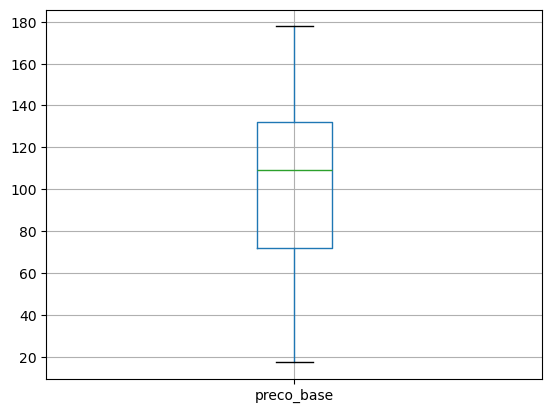

In [16]:
import matplotlib.pyplot as plt 
dfprodutos.boxplot(column=['preco_base'])
plt.show() 

In [17]:
dfvendas

,venda_id,data,cliente_id,produto_id,rep_id,regiao,uf,canal,qtd,preco_unit,desconto,receita_bruta,receita_liquida
0,1,2024-02-15,94,31,16,Sul,PR,Hospitalar,5,159.17,0.16,795.85,668.51
1,2,2024-07-10,188,37,24,Sul,RS,Varejo,11,125.10,0.16,1376.10,1155.92
2,3,2024-03-07,70,39,9,Sudeste,RJ,Varejo,22,111.68,0.06,2456.96,2309.54
3,4,2024-12-29,29,37,22,Norte,AC,Hospitalar,7,132.22,0.05,925.54,879.26
4,5,2024-01-08,190,36,21,Sudeste,SP,Varejo,7,23.94,0.03,167.58,162.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,24996,2024-04-27,108,48,20,Centro-Oeste,GO,Hospitalar,16,76.58,0.09,1225.28,1115.00
24996,24997,2024-06-24,120,23,14,Sudeste,SP,Varejo,9,54.84,0.11,493.56,439.27
24997,24998,2024-01-18,142,24,2,Sudeste,MG,Varejo,39,95.12,0.08,3709.68,3412.91
24998,24999,2024-05-27,140,17,3,Sul,RS,Varejo,11,109.99,0.10,1209.89,1088.90


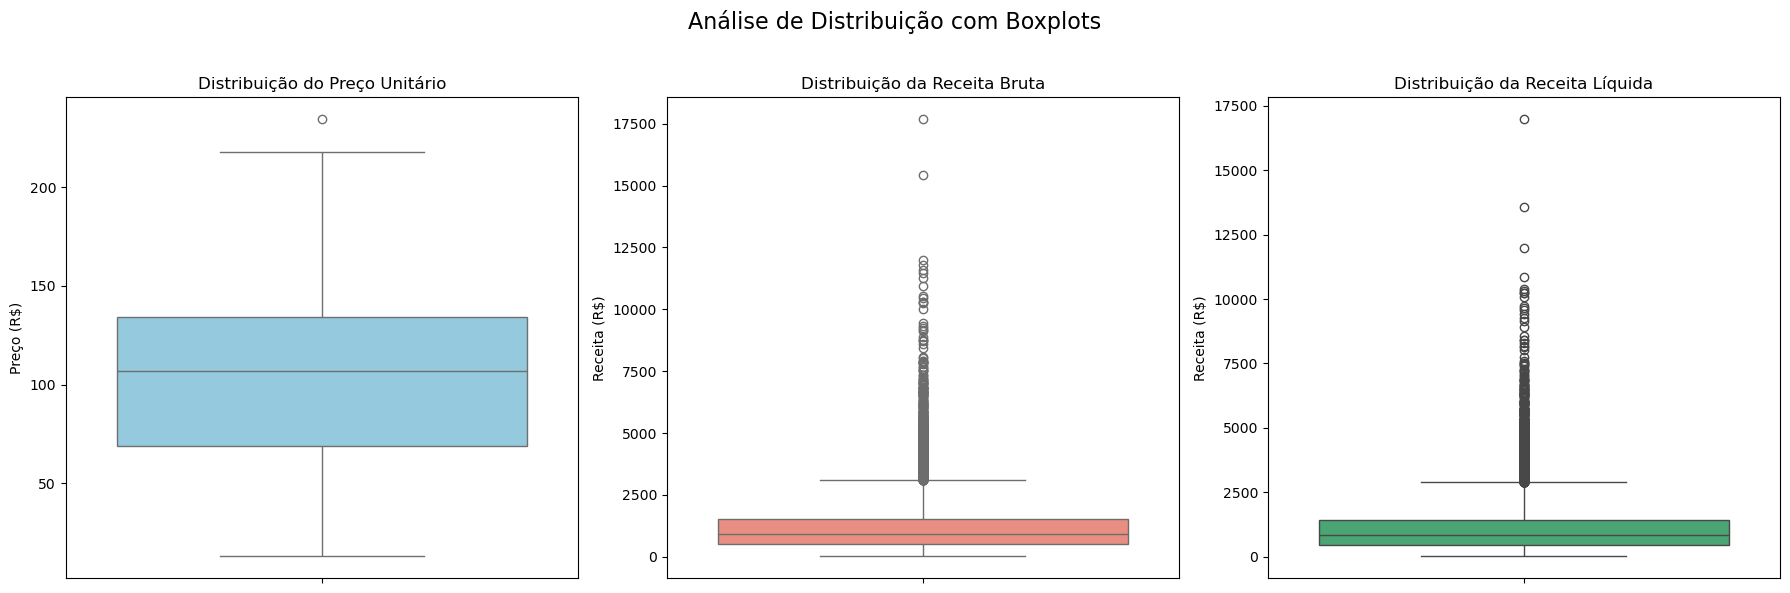

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir as colunas que queremos analisar, porque elas contem valores do dfvendas
colunas_numericas = ['preco_unit', 'receita_bruta', 'receita_liquida']

# Criei uma figura com 3 subplots (1 linha, 3 colunas)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Título para a figura inteira
fig.suptitle('Análise de Distribuição com Boxplots', fontsize=16)

# Gráfico 1: Preço Unitário 
sns.boxplot(y=dfvendas['preco_unit'], ax=axes[0], color='skyblue')
axes[0].set_title('Distribuição do Preço Unitário')
axes[0].set_ylabel('Preço (R$)')

# Gráfico 2: Receita Bruta 
sns.boxplot(y=dfvendas['receita_bruta'], ax=axes[1], color='salmon')
axes[1].set_title('Distribuição da Receita Bruta')
axes[1].set_ylabel('Receita (R$)')

# Gráfico 3: Receita Líquida 
sns.boxplot(y=dfvendas['receita_liquida'], ax=axes[2], color='mediumseagreen')
axes[2].set_title('Distribuição da Receita Líquida')
axes[2].set_ylabel('Receita (R$)')
plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()

## Análise da Distribuição de valores monetários 

Os boxplots acima revelam insights importantes sobre o perfil de vendas da empresa:

1.  **Foco em Preço Médio:** A maior parte dos produtos vendidos (`preco_unit`) se concentra na faixa de R$ 75 a R$ 130, com uma mediana um pouco acima de R$ 100. Isso indica que nosso portfólio tem um forte apelo nesse segmento de preço.

2.  **Padrão de Vendas de Cauda Longa:** Ao analisar a `receita_bruta` e a `receita_liquida`, notamos que a maioria das transações gera um valor modesto (mediana em torno de R$ 1.500). No entanto, existe um número expressivo de *outliers* de alto valor.

3.  **Importância das Vendas de Alto Valor:** Essas vendas atípicas (outliers) não devem ser vistas como erros, mas sim como nossos pedidos ou clientes mais valiosos. Eles são cruciais para o faturamento total e merecem uma análise aprofundada para identificarmos oportunidades de crescimento.

### 2.2 Consistência
- Identificação de dados duplicados.

In [19]:
dfvendas[~dfvendas.cliente_id.isin(dfclientes['cliente_id'])].count()

venda_id           0
data               0
cliente_id         0
produto_id         0
rep_id             0
regiao             0
uf                 0
canal              0
qtd                0
preco_unit         0
desconto           0
receita_bruta      0
receita_liquida    0
dtype: int64

In [20]:
dfvendas[~dfvendas.produto_id.isin(dfprodutos['produto_id'])]

,venda_id,data,cliente_id,produto_id,rep_id,regiao,uf,canal,qtd,preco_unit,desconto,receita_bruta,receita_liquida


In [21]:
dfvendas[~dfvendas.venda_id.isin(dfvendas['venda_id'])]

,venda_id,data,cliente_id,produto_id,rep_id,regiao,uf,canal,qtd,preco_unit,desconto,receita_bruta,receita_liquida


In [22]:
dfpag[~dfpag.venda_id.isin(dfvendas['venda_id'])]

,venda_id,data_emissao,data_vencimento,data_pagamento,forma_pagamento,status_pagamento,valor_titulo,status_pago


In [23]:
dfvendas[~dfvendas.venda_id.isin(dfpag['venda_id'])].count()

venda_id           0
data               0
cliente_id         0
produto_id         0
rep_id             0
regiao             0
uf                 0
canal              0
qtd                0
preco_unit         0
desconto           0
receita_bruta      0
receita_liquida    0
dtype: int64

## Dados duplicados

In [24]:
dfclientes[dfclientes.nome_cliente.duplicated()]

,cliente_id,nome_cliente,tipo_cliente,regiao,uf,canal
3,4,Farmácia Preço Justo,Farmácia Independente,Norte,TO,Varejo
6,7,Rede Bem+Saúde,Rede de Farmácias,Norte,RR,Varejo
7,8,Rede Bem+Saúde,Rede de Farmácias,Nordeste,RN,Varejo
10,11,Farmácia Preço Justo,Farmácia Independente,Norte,AP,Varejo
12,13,Rede Bem+Saúde,Rede de Farmácias,Norte,AM,Varejo
...,...,...,...,...,...,...
215,216,Farmácia Esperança,Farmácia Independente,Nordeste,PI,Varejo
216,217,Farmácia Preço Justo,Farmácia Independente,Centro-Oeste,MS,Varejo
217,218,Dist. Farmalog,Distribuidor,Nordeste,CE,Varejo
218,219,Clínica Onco+,Clínica,Norte,AP,Varejo


In [25]:
dfclientes[dfclientes.nome_cliente=='Rede Bem+Saúde']

,cliente_id,nome_cliente,tipo_cliente,regiao,uf,canal
2,3,Rede Bem+Saúde,Rede de Farmácias,Centro-Oeste,DF,Hospitalar
6,7,Rede Bem+Saúde,Rede de Farmácias,Norte,RR,Varejo
7,8,Rede Bem+Saúde,Rede de Farmácias,Nordeste,RN,Varejo
12,13,Rede Bem+Saúde,Rede de Farmácias,Norte,AM,Varejo
40,41,Rede Bem+Saúde,Rede de Farmácias,Centro-Oeste,MS,Varejo
45,46,Rede Bem+Saúde,Rede de Farmácias,Nordeste,PB,Varejo
58,59,Rede Bem+Saúde,Rede de Farmácias,Sul,SC,Varejo
62,63,Rede Bem+Saúde,Rede de Farmácias,Centro-Oeste,MS,Varejo
68,69,Rede Bem+Saúde,Rede de Farmácias,Sudeste,SP,Hospitalar
73,74,Rede Bem+Saúde,Rede de Farmácias,Centro-Oeste,MT,Hospitalar


In [26]:
dfclientes.drop('cliente_id', axis=1).duplicated().sum()

np.int64(25)

In [27]:
dfclientes_agg = dfclientes.groupby('cliente_id').agg(
    Nome_Cliente=('nome_cliente', 'first'),
    Segmento=('tipo_cliente', 'first'),
    Região=('uf', 'first'),
    Numero_de_Registros=('cliente_id', 'size') 
).reset_index()

In [28]:
#Nova fonte tratada
dfclientes_agg

,cliente_id,Nome_Cliente,Segmento,Região,Numero_de_Registros
0,1,Hospital São Lucas,Hospital,RS,1
1,2,Farmácia Preço Justo,Farmácia Independente,DF,1
2,3,Rede Bem+Saúde,Rede de Farmácias,DF,1
3,4,Farmácia Preço Justo,Farmácia Independente,TO,1
4,5,Clínica Dermacare,Clínica,SC,1
...,...,...,...,...,...
215,216,Farmácia Esperança,Farmácia Independente,PI,1
216,217,Farmácia Preço Justo,Farmácia Independente,MS,1
217,218,Dist. Farmalog,Distribuidor,CE,1
218,219,Clínica Onco+,Clínica,AP,1


In [29]:
dfprodutos.produto_id.duplicated().sum()

np.int64(0)

In [30]:
dfpag.venda_id.duplicated().sum()

np.int64(0)

In [31]:
dfvendas.drop('cliente_id', axis=1).duplicated().sum()

np.int64(0)

## 3. Verificação e Tratamento de Dados Duplicados

Nesta seção, realizamos uma investigação sobre a existência de dados duplicados em todos os DataFrames carregados no projeto. O objetivo é garantir a integridade e a unicidade dos registros, principalmente em tabelas de dimensão (cadastros).

### 3.1 Análise de Duplicidade
- Resultados encontrados com `DataFrame.duplicated()`. 

Foi executado um código para verificar dois tipos de duplicidade:
1.  **Duplicidade Completa:** Verificação de linhas que são cópias exatas umas das outras.
2.  **Duplicidade por Chave de Negócio:** Verificação de registros que deveriam ser únicos com base em seu identificador principal (neste caso, `cliente_id`).

### Resultados da Verificação

A análise retornou os seguintes resultados:

* `df_vendas`: **0** linhas duplicadas.
* `df_produtos`: **0** linhas duplicadas.
* `df_vendedores`: **0** linhas duplicadas.
* `df_clientes`:
    * **11** linhas encontradas com duplicidade completa (`.duplicated().sum()`).
    * **25** registros totais envolvidos em duplicidade de `cliente_id` (`.duplicated(subset=['cliente_id'], keep=False)`).

### 3.2 Observações e Conclusões
- Impacto dos duplicados nos resultados.

Apenas o DataFrame `df_clientes` apresentou problemas de duplicidade. As demais tabelas de dimensão (`df_produtos`, `df_vendedores`) e a tabela de fatos (`df_vendas`) mostraram-se consistentes e sem registros repetidos, indicando uma boa qualidade inicial dos dados.

A inconsistência em `df_clientes` representava um risco para a análise, pois poderia levar à contagem incorreta de clientes e à associação errada de vendas.

### 3.3 Ações Tomadas
- Remoção dos duplicados e padronização de registros.

Com base na análise, as seguintes ações foram tomadas:

1.  Os registros duplicados em `df_clientes` foram tratados através de um agrupamento pelo `cliente_id`.
2.  Foi criado um novo DataFrame, `df_clientes_agg`, que agora serve como a tabela de clientes mestre, garantindo que cada cliente seja representado por uma única linha.
3.  Uma nova coluna, `Numero_de_Registros`, foi criada durante o processo para registrar a frequência de cada cliente nos dados originais.

A partir deste ponto, todas as análises que necessitarem de informações de clientes utilizarão o DataFrame `df_clientes_agg`.

## Formato de dados

In [32]:
dfpag

,venda_id,data_emissao,data_vencimento,data_pagamento,forma_pagamento,status_pagamento,valor_titulo,status_pago
0,1,2024-02-15,2024-03-16,2024-03-13,Cartão,Pago,668.51,1
1,2,2024-07-10,2024-08-07,2024-08-04,Boleto,Pago,1155.92,1
2,3,2024-03-07,2024-04-04,2024-04-04,PIX,Pago,2309.54,1
3,4,2024-12-29,2025-01-26,2025-01-25,PIX,Pago,879.26,1
4,5,2024-01-08,2024-02-22,2024-02-19,Cartão,Pago,162.55,1
...,...,...,...,...,...,...,...,...
24995,24996,2024-04-27,2024-06-26,2024-06-25,Cartão,Pago,1115.00,1
24996,24997,2024-06-24,2024-07-24,2024-07-21,PIX,Pago,439.27,1
24997,24998,2024-01-18,2024-02-17,2024-02-15,Cartão,Pago,3412.91,1
24998,24999,2024-05-27,2024-07-26,2024-07-23,PIX,Pago,1088.90,1


In [33]:
# Criar uma coluna apenas com o mês
dfvendas['mes_pedido'] = dfvendas['data'].dt.month

# Criar uma coluna apenas com o ano
dfvendas['ano_pedido'] = dfvendas['data'].dt.year

# Criar uma coluna com o nome do dia da semana
dfvendas['dia_da_semana'] = dfvendas['data'].dt.day_name()

# Criar uma coluna com o trimestre
dfvendas['trimestre'] = dfvendas['data'].dt.quarter

In [34]:
dfvendas

,venda_id,data,cliente_id,produto_id,rep_id,regiao,uf,canal,qtd,preco_unit,desconto,receita_bruta,receita_liquida,mes_pedido,ano_pedido,dia_da_semana,trimestre
0,1,2024-02-15,94,31,16,Sul,PR,Hospitalar,5,159.17,0.16,795.85,668.51,2,2024,Thursday,1
1,2,2024-07-10,188,37,24,Sul,RS,Varejo,11,125.10,0.16,1376.10,1155.92,7,2024,Wednesday,3
2,3,2024-03-07,70,39,9,Sudeste,RJ,Varejo,22,111.68,0.06,2456.96,2309.54,3,2024,Thursday,1
3,4,2024-12-29,29,37,22,Norte,AC,Hospitalar,7,132.22,0.05,925.54,879.26,12,2024,Sunday,4
4,5,2024-01-08,190,36,21,Sudeste,SP,Varejo,7,23.94,0.03,167.58,162.55,1,2024,Monday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,24996,2024-04-27,108,48,20,Centro-Oeste,GO,Hospitalar,16,76.58,0.09,1225.28,1115.00,4,2024,Saturday,2
24996,24997,2024-06-24,120,23,14,Sudeste,SP,Varejo,9,54.84,0.11,493.56,439.27,6,2024,Monday,2
24997,24998,2024-01-18,142,24,2,Sudeste,MG,Varejo,39,95.12,0.08,3709.68,3412.91,1,2024,Thursday,1
24998,24999,2024-05-27,140,17,3,Sul,RS,Varejo,11,109.99,0.10,1209.89,1088.90,5,2024,Monday,2


# 4. Tratamento e Enriquecimento de Dados Temporais

### 4.1 Objetivo
- Padronizar datas de vendas e pagamentos. 

Para possibilitar futuras análises de sazonalidade, tendências de vendas e outros padrões baseados em tempo, foi necessário processar e extrair componentes da coluna `data` no DataFrame `dfvendas`. O objetivo desta etapa é enriquecer a base de dados com informações temporais que possam ser facilmente agrupadas e analisadas.

### 4.2 Ações Realizadas
- Conversão de colunas de string para datetime.  
- Criação de novas features de tempo.  

A partir da coluna `data` do `dfvendas`, que já estava no formato `datetime64` (ideal para manipulação), foram criadas as seguintes colunas auxiliares utilizando o acessador `.dt` do Pandas:

* **`mes_pedido`**: Extrai o número do mês (de 1 a 12) de cada venda.
* **`ano_pedido`**: Extrai o ano de cada venda.
* **`dia_da_semana`**: Extrai o nome do dia da semana correspondente à data da venda.
* **`trimestre`**: Extrai o trimestre do ano (de 1 a 4) em que a venda ocorreu.

### 4.3 Resultados
- Datas consistentes para análises temporais. 

O DataFrame `dfvendas` agora contém quatro novas colunas que detalham a dimensão temporal de cada transação. Estes novos campos estão prontos para serem utilizados em agregações (`groupby`) e visualizações, facilitando a análise de desempenho de vendas ao longo do tempo.

## 4.4. Próximo Passo

A próxima etapa será a definição dos índices (*indexes*) dos DataFrames para otimizar a estrutura e preparar os dados para futuras junções e análises.

## 5. Definição de Índices (Indexes)

### 5.1 Objetivo
- Otimizar consultas e operações.

Para otimizar a performance das buscas e preparar os DataFrames para as operações de junção (`join` ou `merge`), é uma boa prática definir um índice explícito para cada tabela. O índice (ou chave primária) serve como um identificador único para cada registro, tornando as conexões entre as tabelas mais rápidas e eficientes.

### 5.2 Ações Realizadas
- Definição de índices em colunas-chave (`ID_Cliente`, `ID_Produto`).

Utilizando o método `.set_index()`, os índices das seguintes tabelas foram definidos:

* **`dfvendas`**: O índice foi definido como a coluna **`pedido_id`**. Cada linha nesta tabela representa um item de um pedido, e este ID identifica unicamente cada transação.
* **`dfprodutos`**: O índice foi definido como a coluna **`ID do Produto`** (ou `produto_id`, se você renomeou). Isso permite uma busca direta e rápida por informações de um produto específico.
* **`dfclientes`**: O índice foi definido como a coluna **`cliente_id`**. Isso garante que cada cliente no cadastro seja único e facilita a junção com a tabela de vendas.

### 5.3 Resultados
- Aumento na eficiência de joins e merges.

Todos os DataFrames agora possuem um índice significativo e alinhado com a regra de negócio. Esta estrutura de dados organizada é a base para a próxima fase da análise, onde iremos combinar as informações de diferentes tabelas para responder a perguntas mais complexas.

## 5.4. Próximo Passo

Com os índices devidamente configurados, o próximo passo será realizar as **junções (`joins`)** entre as tabelas para criar um DataFrame unificado. Este DataFrame consolidado permitirá análises que cruzam informações de vendas, clientes e produtos simultaneamente.

In [35]:
dfclientes= dfclientes.set_index('cliente_id')
dfclientes

,nome_cliente,tipo_cliente,regiao,uf,canal
cliente_id,,,,,
1,Hospital São Lucas,Hospital,Sul,RS,Varejo
2,Farmácia Preço Justo,Farmácia Independente,Centro-Oeste,DF,Hospitalar
3,Rede Bem+Saúde,Rede de Farmácias,Centro-Oeste,DF,Hospitalar
4,Farmácia Preço Justo,Farmácia Independente,Norte,TO,Varejo
5,Clínica Dermacare,Clínica,Sul,SC,Varejo
...,...,...,...,...,...
216,Farmácia Esperança,Farmácia Independente,Nordeste,PI,Varejo
217,Farmácia Preço Justo,Farmácia Independente,Centro-Oeste,MS,Varejo
218,Dist. Farmalog,Distribuidor,Nordeste,CE,Varejo


In [36]:
dfclientes.index

Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
       ...
       211, 212, 213, 214, 215, 216, 217, 218, 219, 220],
      dtype='int64', name='cliente_id', length=220)

In [37]:
dfprodutos = dfprodutos.set_index('produto_id')

In [38]:
dfprodutos.index

Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60],
      dtype='int64', name='produto_id')

In [39]:
dfrepresentantes= dfrepresentantes.set_index('rep_id')

In [40]:
dfvendas= dfvendas.set_index('venda_id')
dfvendas

,data,cliente_id,produto_id,rep_id,regiao,uf,canal,qtd,preco_unit,desconto,receita_bruta,receita_liquida,mes_pedido,ano_pedido,dia_da_semana,trimestre
venda_id,,,,,,,,,,,,,,,,
1,2024-02-15,94,31,16,Sul,PR,Hospitalar,5,159.17,0.16,795.85,668.51,2,2024,Thursday,1
2,2024-07-10,188,37,24,Sul,RS,Varejo,11,125.10,0.16,1376.10,1155.92,7,2024,Wednesday,3
3,2024-03-07,70,39,9,Sudeste,RJ,Varejo,22,111.68,0.06,2456.96,2309.54,3,2024,Thursday,1
4,2024-12-29,29,37,22,Norte,AC,Hospitalar,7,132.22,0.05,925.54,879.26,12,2024,Sunday,4
5,2024-01-08,190,36,21,Sudeste,SP,Varejo,7,23.94,0.03,167.58,162.55,1,2024,Monday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24996,2024-04-27,108,48,20,Centro-Oeste,GO,Hospitalar,16,76.58,0.09,1225.28,1115.00,4,2024,Saturday,2
24997,2024-06-24,120,23,14,Sudeste,SP,Varejo,9,54.84,0.11,493.56,439.27,6,2024,Monday,2
24998,2024-01-18,142,24,2,Sudeste,MG,Varejo,39,95.12,0.08,3709.68,3412.91,1,2024,Thursday,1


In [41]:
dfpag= dfpag.set_index('venda_id')
dfpag

,data_emissao,data_vencimento,data_pagamento,forma_pagamento,status_pagamento,valor_titulo,status_pago
venda_id,,,,,,,
1,2024-02-15,2024-03-16,2024-03-13,Cartão,Pago,668.51,1
2,2024-07-10,2024-08-07,2024-08-04,Boleto,Pago,1155.92,1
3,2024-03-07,2024-04-04,2024-04-04,PIX,Pago,2309.54,1
4,2024-12-29,2025-01-26,2025-01-25,PIX,Pago,879.26,1
5,2024-01-08,2024-02-22,2024-02-19,Cartão,Pago,162.55,1
...,...,...,...,...,...,...,...
24996,2024-04-27,2024-06-26,2024-06-25,Cartão,Pago,1115.00,1
24997,2024-06-24,2024-07-24,2024-07-21,PIX,Pago,439.27,1
24998,2024-01-18,2024-02-17,2024-02-15,Cartão,Pago,3412.91,1


In [42]:
dfpag.index

Index([    1,     2,     3,     4,     5,     6,     7,     8,     9,    10,
       ...
       24991, 24992, 24993, 24994, 24995, 24996, 24997, 24998, 24999, 25000],
      dtype='int64', name='venda_id', length=25000)

# 6. Integração de Dados (Data Fusion / Joins)

## 6.1. Objetivo
- Integrar todas as tabelas em um único DataFrame consolidado.

Com as tabelas individuais carregadas e pré-processadas, o objetivo desta fase foi consolidar todas as informações em um único DataFrame mestre. Este processo, conhecido como "Data Fusion", é essencial para permitir uma análise integrada, cruzando dados de vendas com informações detalhadas de clientes, produtos e pagamentos para gerar uma visão 360 graus do negócio.

### 6.2 Ações Realizadas
- Merge entre clientes, produtos, representantes, vendas e pagamentos.

Para construir o DataFrame final (`dfcompleto`), foi realizada uma sequência de três junções (`merges`), utilizando a biblioteca Pandas e as chaves de ligação apropriadas para cada etapa:

1.  **União de Vendas com Clientes:** A tabela de vendas (`dfvendas`) foi unida à tabela de clientes únicos (`dfclientes_unicos`) utilizando a chave `cliente_id`. Isso enriqueceu cada registro de venda com os dados demográficos do cliente correspondente.

2.  **Adição dos Dados de Produtos:** O resultado da primeira união foi, então, combinado com a tabela de produtos (`dfprodutos`), usando a chave `produto_id`. Esta etapa adicionou detalhes específicos de cada produto vendido, como nome, categoria e preço.

3.  **Incorporação dos Dados de Pagamento:** Por fim, a tabela resultante foi unida à tabela de pagamentos (`dfpag`) através da chave `venda_id`. Esta junção final incorporou as informações transacionais cruciais, incluindo a `data` da venda, a `data_pagamento`, a `forma_pagamento` e o `status`.

### 6.3 Resultado e Estrutura Final
- Criação do `dfcompleto`, base única para análise exploratória.

O resultado é o DataFrame `dfcompleto`, uma tabela única e coesa contendo todas as informações necessárias para a análise. Como passo final de estruturação, a coluna `venda_id` foi definida como o **índice** do DataFrame, garantindo que cada linha represente uma transação única e facilmente localizável.

A próxima etapa será a análise e o tratamento de valores nulos (`NaN`) que possam ter surgido durante o processo de junção.

In [43]:
# unir a tabela vendas com clientes
dfcompleto = dfvendas.join(dfclientes, on='cliente_id', lsuffix='_vendas', rsuffix='_clientes')
dfcompleto = dfcompleto.join(dfprodutos.add_prefix('produto_'), on= 'produto_id')
dfcompleto = dfcompleto.join(dfpag, on= 'venda_id')

In [44]:
dfcompleto

,data,cliente_id,produto_id,rep_id,regiao_vendas,uf_vendas,canal_vendas,qtd,preco_unit,desconto,receita_bruta,receita_liquida,mes_pedido,ano_pedido,dia_da_semana,trimestre,nome_cliente,tipo_cliente,regiao_clientes,uf_clientes,canal_clientes,produto_nome_produto,produto_categoria,produto_preco_base,produto_marca,produto_linha,data_emissao,data_vencimento,data_pagamento,forma_pagamento,status_pagamento,valor_titulo,status_pago
venda_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2024-02-15,94,31,16,Sul,PR,Hospitalar,5,159.17,0.16,795.85,668.51,2,2024,Thursday,1,Farmácia Do Povo,Farmácia Independente,Sul,PR,Hospitalar,NeoDuo 40 mg (xarope),Sistema Nervoso,149.16,NeoQuim,Suplemento,2024-02-15,2024-03-16,2024-03-13,Cartão,Pago,668.51,1
2,2024-07-10,188,37,24,Sul,RS,Varejo,11,125.10,0.16,1376.10,1155.92,7,2024,Wednesday,3,Farmácia Modelo,Farmácia Independente,Sul,RS,Varejo,VitaCare 200 mg (comprimido),Antibióticos,129.66,SaúdeMais,Suplemento,2024-07-10,2024-08-07,2024-08-04,Boleto,Pago,1155.92,1
3,2024-03-07,70,39,9,Sudeste,RJ,Varejo,22,111.68,0.06,2456.96,2309.54,3,2024,Thursday,1,Farmácia Boa Saúde,Farmácia Independente,Sudeste,RJ,Varejo,HixPlus 10 mg (spray),Respiratórios,123.47,BioVida,Suplemento,2024-03-07,2024-04-04,2024-04-04,PIX,Pago,2309.54,1
4,2024-12-29,29,37,22,Norte,AC,Hospitalar,7,132.22,0.05,925.54,879.26,12,2024,Sunday,4,Dist. Farmalog,Distribuidor,Norte,AC,Hospitalar,VitaCare 200 mg (comprimido),Antibióticos,129.66,SaúdeMais,Suplemento,2024-12-29,2025-01-26,2025-01-25,PIX,Pago,879.26,1
5,2024-01-08,190,36,21,Sudeste,SP,Varejo,7,23.94,0.03,167.58,162.55,1,2024,Monday,1,Clínica Vida Plena,Clínica,Sudeste,SP,Varejo,CardioForte 20 mg (gotas),Analgésicos,27.64,Hypera Pharma,RX,2024-01-08,2024-02-22,2024-02-19,Cartão,Pago,162.55,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24996,2024-04-27,108,48,20,Centro-Oeste,GO,Hospitalar,16,76.58,0.09,1225.28,1115.00,4,2024,Saturday,2,Hospital Esperança,Hospital,Centro-Oeste,GO,Hospitalar,HepaPlus 10 mg (comprimido),Endócrinos,72.25,SaúdeMais,RX,2024-04-27,2024-06-26,2024-06-25,Cartão,Pago,1115.00,1
24997,2024-06-24,120,23,14,Sudeste,SP,Varejo,9,54.84,0.11,493.56,439.27,6,2024,Monday,2,Clínica CardioCenter,Clínica,Sudeste,SP,Varejo,ImunoCare 100 mg (comprimido),Analgésicos,57.72,BioVida,Dermocosmético,2024-06-24,2024-07-24,2024-07-21,PIX,Pago,439.27,1
24998,2024-01-18,142,24,2,Sudeste,MG,Varejo,39,95.12,0.08,3709.68,3412.91,1,2024,Thursday,1,Rede MaxFarma,Rede de Farmácias,Sudeste,MG,Varejo,ImunoForte 5 mg (xarope),Endócrinos,97.81,NeoQuim,Suplemento,2024-01-18,2024-02-17,2024-02-15,Cartão,Pago,3412.91,1


## Dados nulos

In [45]:
dfcompleto.isnull().sum()

data                       0
cliente_id                 0
produto_id                 0
rep_id                     0
regiao_vendas              0
uf_vendas                  0
canal_vendas               0
qtd                        0
preco_unit                 0
desconto                   0
receita_bruta              0
receita_liquida            0
mes_pedido                 0
ano_pedido                 0
dia_da_semana              0
trimestre                  0
nome_cliente               0
tipo_cliente               0
regiao_clientes            0
uf_clientes                0
canal_clientes             0
produto_nome_produto       0
produto_categoria          0
produto_preco_base         0
produto_marca              0
produto_linha              0
data_emissao               0
data_vencimento            0
data_pagamento          1511
forma_pagamento            0
status_pagamento           0
valor_titulo               0
status_pago                0
dtype: int64

In [46]:
# Removendo as 1511 linhas onde a data de pagamento é nula
print(f"Número de linhas antes da limpeza: {len(dfcompleto)}")
dfcompleto.dropna(subset=['data_pagamento'], inplace=True)
print(f"Número de linhas após a limpeza: {len(dfcompleto)}")

# Verificação final para garantir que a limpeza funcionou
nulos_restantes = dfcompleto['data_pagamento'].isnull().sum()
print(f"\nValores nulos restantes em 'data_pagamento': {nulos_restantes}")

Número de linhas antes da limpeza: 25000
Número de linhas após a limpeza: 23489

Valores nulos restantes em 'data_pagamento': 0


In [47]:
# Vamos filtrar e exibir a linha onde a coluna 'data_pagamento' é nula
linha_nula = dfcompleto[dfcompleto['data_pagamento'].isnull()]

display(linha_nula)

,data,cliente_id,produto_id,rep_id,regiao_vendas,uf_vendas,canal_vendas,qtd,preco_unit,desconto,receita_bruta,receita_liquida,mes_pedido,ano_pedido,dia_da_semana,trimestre,nome_cliente,tipo_cliente,regiao_clientes,uf_clientes,canal_clientes,produto_nome_produto,produto_categoria,produto_preco_base,produto_marca,produto_linha,data_emissao,data_vencimento,data_pagamento,forma_pagamento,status_pagamento,valor_titulo,status_pago
venda_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [48]:
# Vamos analisar as estatísticas do tempo de pagamento
print(dfcompleto['data_pagamento'].describe())

count                            23489
mean     2024-07-31 15:16:23.490144256
min                2024-01-04 00:00:00
25%                2024-04-30 00:00:00
50%                2024-08-01 00:00:00
75%                2024-11-01 00:00:00
max                2025-03-30 00:00:00
Name: data_pagamento, dtype: object


In [49]:
# Analisando o tempo médio de pagamento por segmento de cliente
tempo_por_segmento = dfcompleto.groupby('regiao_vendas')['data_pagamento'].mean().sort_values(ascending=False)
print(tempo_por_segmento)

regiao_vendas
Norte          2024-08-01 12:58:34.960629760
Sudeste        2024-08-01 08:44:07.120418816
Centro-Oeste   2024-07-31 10:31:56.839134464
Sul            2024-07-31 02:16:17.114056448
Nordeste       2024-07-30 22:23:34.207205376
Name: data_pagamento, dtype: datetime64[ns]


In [50]:
# --- CRIANDO A COLUNA 'tempo_pagamento' ---

# Garante que as colunas de data estejam no formato correto (boa prática)
dfcompleto['data_pagamento'] = pd.to_datetime(dfcompleto['data_pagamento'])
dfcompleto['data'] = pd.to_datetime(dfcompleto['data'])

# Cria a nova coluna com a diferença em dias
dfcompleto['tempo_pagamento'] = (dfcompleto['data_pagamento'] - dfcompleto['data']).dt.days

print("Coluna 'tempo_pagamento' criada com sucesso!")
display(dfcompleto[['data', 'data_pagamento', 'tempo_pagamento']].head())

Coluna 'tempo_pagamento' criada com sucesso!


,data,data_pagamento,tempo_pagamento
venda_id,,,
1,2024-02-15,2024-03-13,27
2,2024-07-10,2024-08-04,25
3,2024-03-07,2024-04-04,28
4,2024-12-29,2025-01-25,27
5,2024-01-08,2024-02-19,42


In [51]:
tempo_medio_por_cidade = dfcompleto.groupby('regiao_vendas')['tempo_pagamento'].mean().sort_values(ascending=False)
print("\nTempo médio de pagamento por Cidade (em dias):")
print(tempo_medio_por_cidade)


Tempo médio de pagamento por Cidade (em dias):
regiao_vendas
Centro-Oeste    29.881703
Sul             29.618630
Norte           29.509186
Sudeste         29.499321
Nordeste        29.370649
Name: tempo_pagamento, dtype: float64


In [52]:
dfcompleto

,data,cliente_id,produto_id,rep_id,regiao_vendas,uf_vendas,canal_vendas,qtd,preco_unit,desconto,receita_bruta,receita_liquida,mes_pedido,ano_pedido,dia_da_semana,trimestre,nome_cliente,tipo_cliente,regiao_clientes,uf_clientes,canal_clientes,produto_nome_produto,produto_categoria,produto_preco_base,produto_marca,produto_linha,data_emissao,data_vencimento,data_pagamento,forma_pagamento,status_pagamento,valor_titulo,status_pago,tempo_pagamento
venda_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2024-02-15,94,31,16,Sul,PR,Hospitalar,5,159.17,0.16,795.85,668.51,2,2024,Thursday,1,Farmácia Do Povo,Farmácia Independente,Sul,PR,Hospitalar,NeoDuo 40 mg (xarope),Sistema Nervoso,149.16,NeoQuim,Suplemento,2024-02-15,2024-03-16,2024-03-13,Cartão,Pago,668.51,1,27
2,2024-07-10,188,37,24,Sul,RS,Varejo,11,125.10,0.16,1376.10,1155.92,7,2024,Wednesday,3,Farmácia Modelo,Farmácia Independente,Sul,RS,Varejo,VitaCare 200 mg (comprimido),Antibióticos,129.66,SaúdeMais,Suplemento,2024-07-10,2024-08-07,2024-08-04,Boleto,Pago,1155.92,1,25
3,2024-03-07,70,39,9,Sudeste,RJ,Varejo,22,111.68,0.06,2456.96,2309.54,3,2024,Thursday,1,Farmácia Boa Saúde,Farmácia Independente,Sudeste,RJ,Varejo,HixPlus 10 mg (spray),Respiratórios,123.47,BioVida,Suplemento,2024-03-07,2024-04-04,2024-04-04,PIX,Pago,2309.54,1,28
4,2024-12-29,29,37,22,Norte,AC,Hospitalar,7,132.22,0.05,925.54,879.26,12,2024,Sunday,4,Dist. Farmalog,Distribuidor,Norte,AC,Hospitalar,VitaCare 200 mg (comprimido),Antibióticos,129.66,SaúdeMais,Suplemento,2024-12-29,2025-01-26,2025-01-25,PIX,Pago,879.26,1,27
5,2024-01-08,190,36,21,Sudeste,SP,Varejo,7,23.94,0.03,167.58,162.55,1,2024,Monday,1,Clínica Vida Plena,Clínica,Sudeste,SP,Varejo,CardioForte 20 mg (gotas),Analgésicos,27.64,Hypera Pharma,RX,2024-01-08,2024-02-22,2024-02-19,Cartão,Pago,162.55,1,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24996,2024-04-27,108,48,20,Centro-Oeste,GO,Hospitalar,16,76.58,0.09,1225.28,1115.00,4,2024,Saturday,2,Hospital Esperança,Hospital,Centro-Oeste,GO,Hospitalar,HepaPlus 10 mg (comprimido),Endócrinos,72.25,SaúdeMais,RX,2024-04-27,2024-06-26,2024-06-25,Cartão,Pago,1115.00,1,59
24997,2024-06-24,120,23,14,Sudeste,SP,Varejo,9,54.84,0.11,493.56,439.27,6,2024,Monday,2,Clínica CardioCenter,Clínica,Sudeste,SP,Varejo,ImunoCare 100 mg (comprimido),Analgésicos,57.72,BioVida,Dermocosmético,2024-06-24,2024-07-24,2024-07-21,PIX,Pago,439.27,1,27
24998,2024-01-18,142,24,2,Sudeste,MG,Varejo,39,95.12,0.08,3709.68,3412.91,1,2024,Thursday,1,Rede MaxFarma,Rede de Farmácias,Sudeste,MG,Varejo,ImunoForte 5 mg (xarope),Endócrinos,97.81,NeoQuim,Suplemento,2024-01-18,2024-02-17,2024-02-15,Cartão,Pago,3412.91,1,28


## 7. Plano de Análise de Dados – Projeto Farmacêutico

## Introdução

Este documento descreve o roteiro de análises a serem realizadas no DataFrame `dfcompleto`. O objetivo é extrair insights acionáveis e responder a perguntas de negócio chave, utilizando os dados limpos e unificados. O plano é dividido em duas partes: as análises originalmente propostas no roteiro do projeto e novas análises sugeridas para aprofundar a investigação.

---

## . Análises do Roteiro Original (PowerPoint)

Estas são as perguntas que definimos no início do projeto. Agora temos os dados prontos para respondê-las.

### 7.1. Análises de Vendas e Produtos

* **Quais são os medicamentos mais vendidos?**
    * **Como:** Agrupar `dfcompleto` por `nome_produto` e somar a `quantidade` e o `faturamento`.
* **Existe uma Curva de Pareto (Princípio 80/20)?**
    * **Como:** Calcular o faturamento acumulado por produto e verificar se ~80% da receita vem de ~20% dos produtos.
* **Existem produtos sazonais (meses com picos de vendas)?**
    * **Como:** Agrupar o faturamento/quantidade pela coluna `mes_pedido`.
* **Receita vs. Volume: Quais produtos lideram em cada métrica?**
    * **Como:** Criar rankings separados para a soma de `faturamento` e `quantidade` por `nome_produto`.

### 7.2. Análises de Clientes e Regiões

* **Quais clientes compram mais (em volume e receita)?**
    * **Como:** Agrupar por `nome_cliente` e somar `faturamento` e `quantidade`.
* **Qual região (cidade) mais consome?**
    * **Como:** Agrupar por `cidade` e somar o `faturamento`.
* **Existe diferença de perfil de compra entre os segmentos?**
    * **Como:** Agrupar por `segmento` e analisar as médias de faturamento, categorias de produtos mais compradas, etc.

### 7.3. Análises Financeiras

* **Qual o faturamento total e a média por mês?**
    * **Como:** Agrupar por `mes_pedido` e usar `.sum()` e `.mean()` no `faturamento`.
* **Qual o Ticket Médio por cliente e por venda?**
    * **Como:** Calcular `faturamento.sum() / quantidade.sum()` por cliente, ou `faturamento.mean()` por `pedido_id`.
* **Existe inadimplência?**
    * **Como:** Analisar a coluna `status` da tabela de pagamentos. Podemos contar quantos pagamentos estão com status "Pendente" ou "Recusado".

*(**Observação:** As perguntas sobre Logística do roteiro original, como custo de transporte, não podem ser respondidas, pois não temos esses dados no nosso DataFrame).*

---

## 2. Novas Análises Sugeridas (Para Aprofundar)

Com o `dfcompleto` que construímos, podemos ir além. Aqui estão algumas análises de alto valor que você pode adicionar ao seu projeto:

### 2.1. Análise de Tempo de Pagamento

* **O que é:** Calcular a diferença em dias entre a data da venda e a data do pagamento.
* **Por que é valioso:** Ajuda a entender o comportamento de pagamento dos clientes e a saúde do fluxo de caixa. Clientes que pagam mais rápido são mais valiosos.
* **Colunas necessárias:** `data` e `data_pagamento`.
* **Como fazer:**
    1.  Garantir que ambas as colunas sejam do tipo `datetime`.
    2.  Criar uma nova coluna: `tempo_pagamento = dfcompleto['data_pagamento'] - dfcompleto['data']`.
    3.  Analisar a média de `tempo_pagamento` por cliente ou segmento.

### 2.2. Análise RFM (Recência, Frequência, Valor Monetário)

* **O que é:** Uma técnica de segmentação que classifica os clientes com base em três dimensões:
    * **Recência:** Quão recentemente eles compraram?
    * **Frequência:** Com que frequência eles compram?
    * **Monetário:** Quanto eles gastam?
* **Por que é valioso:** É uma das formas mais poderosas de identificar seus "melhores clientes", "clientes em risco de churn" e "clientes que precisam de atenção". É um grande diferencial para um portfólio.
* **Colunas necessárias:** `cliente_id`, `data`, `faturamento`.
* **Como fazer (resumo):**
    1.  Para cada cliente, calcular a recência (diferença entre a data mais recente da análise e a última data de compra do cliente).
    2.  Calcular a frequência (número total de pedidos).
    3.  Calcular o valor monetário (soma total do faturamento).
    4.  Criar pontuações (ex: de 1 a 5) para cada dimensão e classificar os clientes.

### 2.3. Análise de Mix de Produtos por Segmento

* **O que é:** Entender quais categorias de produtos são preferidas por cada segmento de cliente.
* **Por que é valioso:** Permite a criação de campanhas de marketing direcionadas e estratégias de cross-sell/up-sell.
* **Colunas necessárias:** `segmento`, `categoria`, `faturamento`.
* **Como fazer:**
    1.  Agrupar os dados por `segmento` e `categoria`.
    2.  Calcular o faturamento para cada combinação.
    3.  Visualizar os resultados (ex: com um gráfico de barras empilhadas) para ver a participação de cada categoria dentro de cada segmento.

# Análises 

## Quais são os medicamentos e regiões que  mais vendem ?

In [53]:
#.count(): Responde "Onde vendemos com mais frequência?" (Volume de transações).
graf_dados = dfcompleto.groupby('uf_vendas').count().produto_nome_produto.sort_values(ascending=False)
graf_dados

uf_vendas
RS    2158
SP    1863
MG    1745
SC    1729
DF    1623
PR    1470
AP    1061
MT    1004
RJ     971
CE     876
PA     851
MS     850
PI     811
GO     775
PE     749
MA     744
RN     678
ES     578
AC     425
RO     421
AM     411
TO     406
SE     328
AL     311
RR     235
BA     213
PB     203
Name: produto_nome_produto, dtype: int64

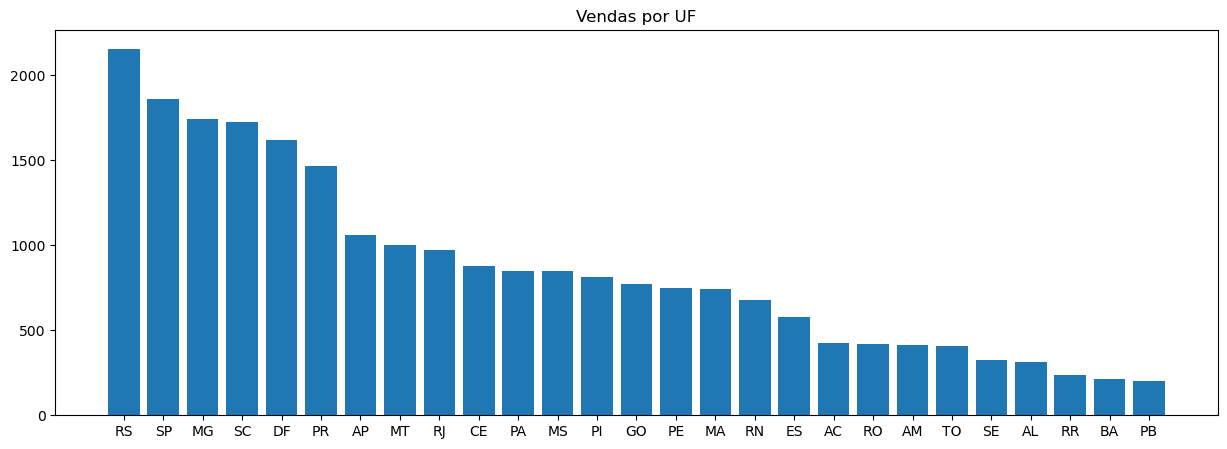

In [54]:
plt.figure(figsize=(15,5))
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Vendas por UF')
plt.show()

In [55]:
# Análise por RECEITA (para saber qual UF gera mais dinheiro) .sum() na receita: Responde "Onde ganhamos mais dinheiro?" (Volume financeiro).
vendas_por_receita = dfcompleto.groupby('uf_vendas')['receita_liquida'].sum().sort_values(ascending=False)

In [56]:
vendas_por_receita

uf_vendas
RS    2315257.11
SP    2079059.56
MG    1917198.16
SC    1896530.07
DF    1819837.68
PR    1550872.16
AP    1186861.19
MT    1102680.05
RJ    1050165.75
CE     953776.67
MS     927115.28
PA     910078.07
PI     850646.28
GO     848931.63
MA     830218.23
PE     790384.33
RN     740342.30
ES     635972.91
AM     470639.79
TO     467155.84
AC     461890.13
RO     448427.94
SE     385128.26
AL     330174.68
RR     294848.44
BA     249553.24
PB     220311.47
Name: receita_liquida, dtype: float64

### Análise 1: Top 10 UFs por Volume de Vendas

Este gráfico mostra o ranking dos estados com base no **número total de transações** realizadas. Ele responde à pergunta: "Onde nossas operações são mais frequentes?". Podemos observar que Rio Grande do SUl (RS) lidera com uma margem significativa.

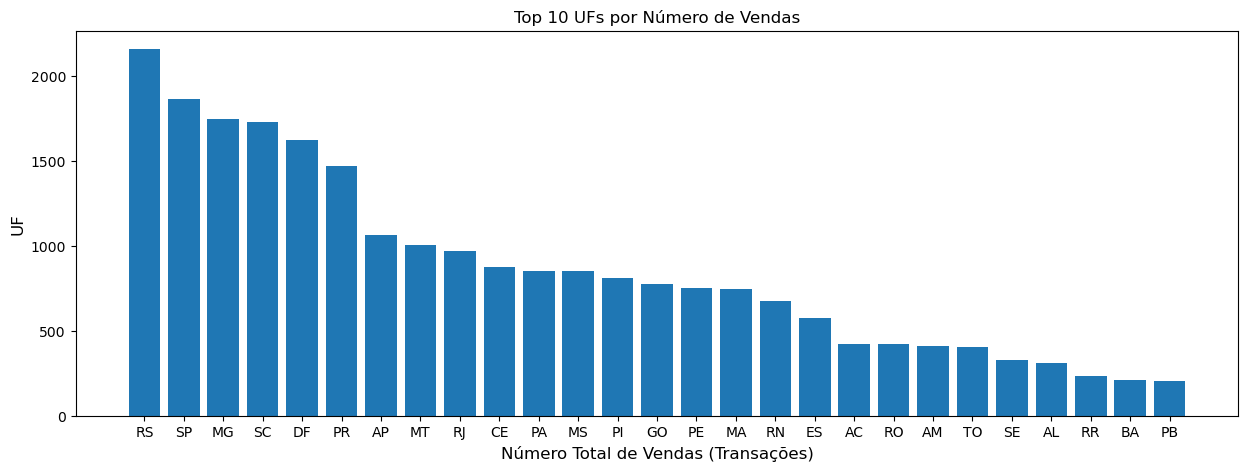

In [57]:
#[**CÉLULA DE CÓDIGO 1**]
plt.figure(figsize=(15,5))
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Top 10 UFs por Número de Vendas', fontsize=12) 
plt.xlabel('Número Total de Vendas (Transações)', fontsize=12)
plt.ylabel('UF', fontsize=12)
plt.show()

### Análise por Região Geográfica (UF)

A análise geográfica buscou entender onde nossas vendas estão concentradas, tanto em termos de frequência operacional quanto de resultado financeiro.

* **Principal Insight de Frequência (Nº de Vendas):** O **Rio Grande do Sul (RS)** se confirmou como o estado com o maior número de transações. *(Nota: você precisará re-executar a análise de contagem para obter o número exato, se desejar)*.

* **Principal Insight de Rentabilidade (Receita):** O **Rio Grande do Sul (RS)** também lidera como o estado que mais gera receita, com um faturamento de mais de **R$ 2.31 milhões**, à frente de São Paulo (SP), com **R$ 2.07 milhões**.

#### **Conclusão Estratégica (Regiões):**
As duas métricas confirmam que o **Rio Grande do Sul (RS) é o principal e mais importante mercado para a empresa**, liderando tanto em volume de operações quanto em valor financeiro. As estratégias de crescimento e marketing devem ter este estado como foco principal.

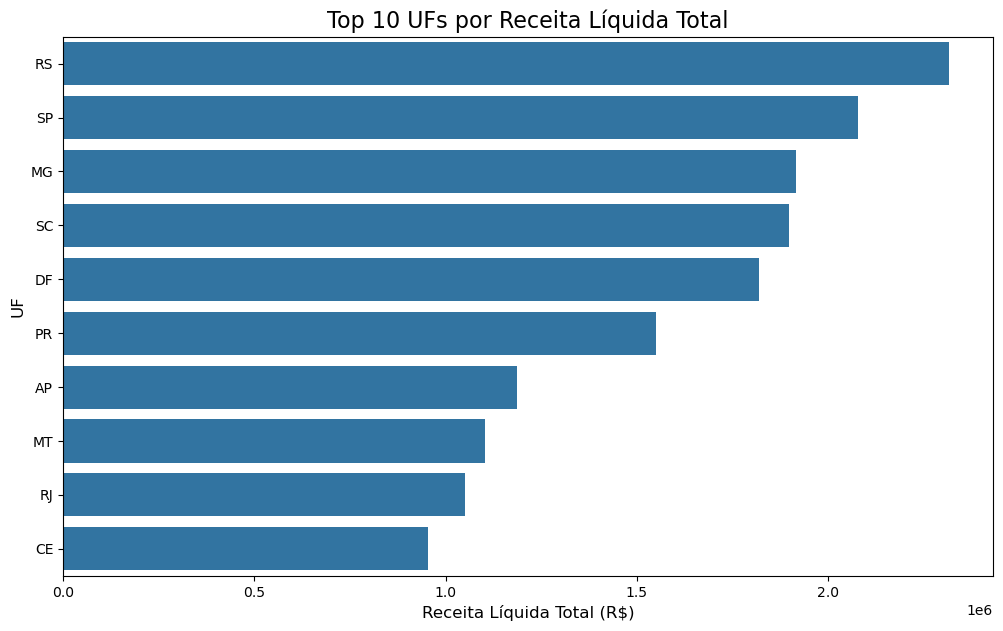

In [58]:
# Código para o gráfico de soma de receita

vendas_por_receita = dfcompleto.groupby('uf_vendas', observed=True)['receita_liquida'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 7))
sns.barplot(x=vendas_por_receita.head(10).values, y=vendas_por_receita.head(10).index)
plt.title('Top 10 UFs por Receita Líquida Total', fontsize=16)
plt.xlabel('Receita Líquida Total (R$)', fontsize=12)
plt.ylabel('UF', fontsize=12)
plt.show()

# Produtos que mais vendem

In [59]:
#Qual é o produto mais popular? qual produto atrai mais cliente para o ato da compra?
produto_por_numero_vendas = dfcompleto.groupby('produto_nome_produto').count().receita_liquida.sort_values(ascending=False)
produto_por_numero_vendas

produto_nome_produto
HepaDuo 40 mg (gel)               442
ImunoCare 100 mg (comprimido)     433
NeuroXR 100 mg (cápsula)          428
NeoPlus 10 mg (gel)               426
NeuroCare 500 mg (xarope)         424
CardioCare 20 mg (spray)          421
ImunoDuo 100 mg (gotas)           420
HepaProtect 5 mg (gel)            418
GastroRapid 5 mg (gel)            417
CardioForte 20 mg (gotas)         416
NeuroDuo 40 mg (cápsula)          410
DermCalm 40 mg (spray)            410
DermMax 10 mg (xarope)            407
GastroPlus 40 mg (creme)          406
ImunoDuo 10 mg (gotas)            405
NeuroPlus 20 mg (comprimido)      404
PulmoForte 500 mg (cápsula)       402
NeuroDuo 500 mg (gotas)           402
DermDuo 20 mg (creme)             401
NeuroFlex 40 mg (creme)           401
ImunoForte 100 mg (comprimido)    400
HepaPlus 10 mg (comprimido)       400
CardioPlus 40 mg (gel)            398
VitaForte 500 mg (spray)          396
NeoMax 200 mg (cápsula)           395
VitaCare 20 mg (comprimido)  

## Visualizando os 10 produtos mais populares

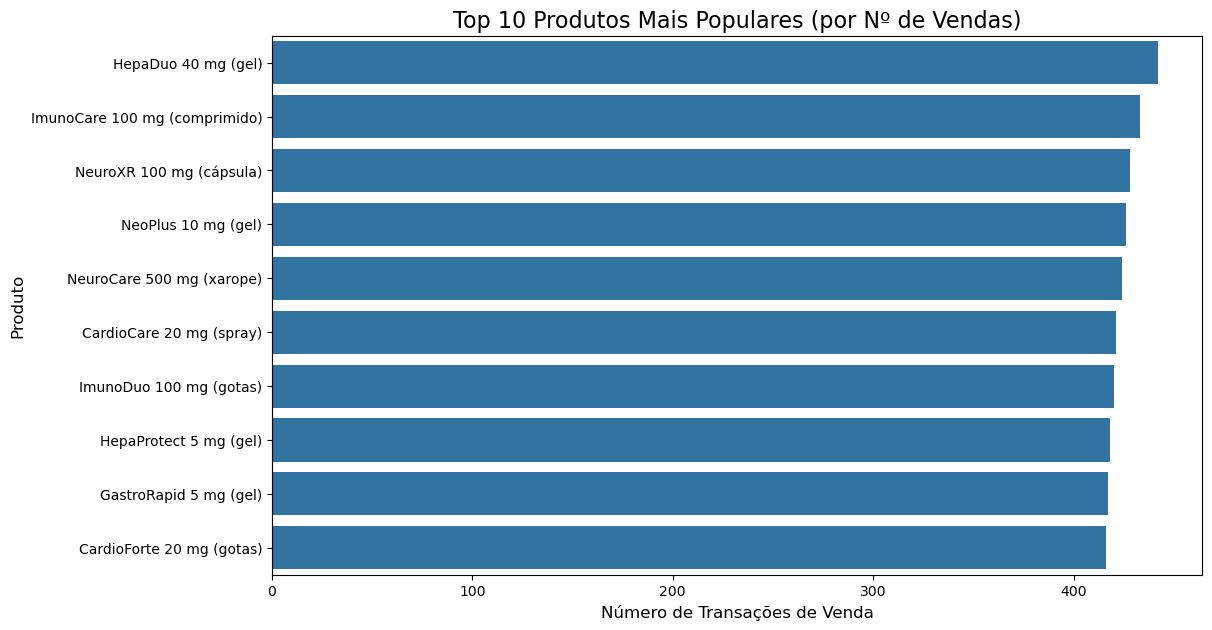

In [60]:
produto_por_numero_vendas = dfcompleto.groupby('produto_nome_produto', observed=True).count().receita_liquida.sort_values(ascending=False)
plt.figure(figsize=(12, 7))
sns.barplot(x=produto_por_numero_vendas.head(10).values, y=produto_por_numero_vendas.head(10).index,)
plt.title('Top 10 Produtos Mais Populares (por Nº de Vendas)', fontsize=16)
plt.xlabel('Número de Transações de Venda', fontsize=12)
plt.ylabel('Produto', fontsize=12)
plt.show()

In [61]:
#De qual produto vendemos o maior volume total de itens?
produto_maior_volume_vendas = dfcompleto.groupby('produto_nome_produto')['qtd'].sum().sort_values(ascending=False)
produto_maior_volume_vendas

produto_nome_produto
HepaDuo 40 mg (gel)               5131
NeuroXR 100 mg (cápsula)          5095
CardioCare 20 mg (spray)          5040
NeoPlus 10 mg (gel)               4891
DermDuo 20 mg (creme)             4890
HepaPlus 10 mg (comprimido)       4884
HepaProtect 5 mg (gel)            4880
HixXR 200 mg (xarope)             4876
CardioPlus 40 mg (gel)            4836
NeuroCare 500 mg (xarope)         4805
DermProtect 20 mg (xarope)        4790
NeuroDuo 40 mg (cápsula)          4790
NeoDuo 40 mg (xarope)             4765
PulmoForte 500 mg (cápsula)       4729
NeuroDuo 500 mg (gotas)           4713
GastroPlus 40 mg (creme)          4708
ImunoDuo 100 mg (gotas)           4698
ImunoForte 100 mg (comprimido)    4676
NeuroPlus 20 mg (comprimido)      4656
NeoMax 200 mg (cápsula)           4646
ImunoDuo 10 mg (gotas)            4623
DermCalm 40 mg (spray)            4612
ImunoCare 100 mg (comprimido)     4596
CardioForte 20 mg (gotas)         4568
NeuroFlex 40 mg (creme)           4547
Gast

## Visualizando os 15 produtos com  mais volume de vendas

C:\Users\Windows\AppData\Local\Temp\ipykernel_12748\3091074892.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


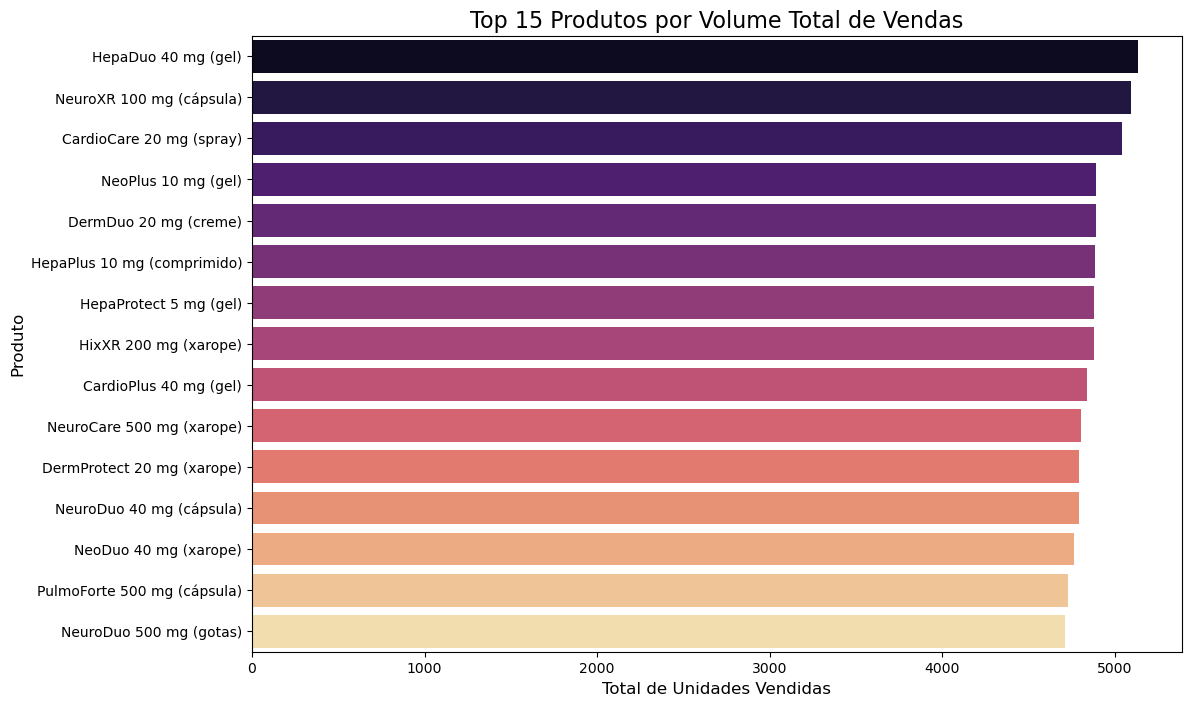

In [62]:
plt.figure(figsize=(12, 8))
sns.barplot(
    x=produto_maior_volume_vendas.head(15).values, 
    y=produto_maior_volume_vendas.head(15).index, 
    palette='magma'
)
plt.title('Top 15 Produtos por Volume Total de Vendas', fontsize=16)
plt.xlabel('Total de Unidades Vendidas', fontsize=12)
plt.ylabel('Produto', fontsize=12)
plt.show()

## Qual produto gera mais dinheiro para a empresa?

In [63]:
# qual produto gera mais dinheiro para a empresa?
produto_maior_receita = dfcompleto.groupby('produto_nome_produto')['receita_liquida'].sum().sort_values(ascending=False)
produto_maior_receita

produto_nome_produto
NeuroCare 500 mg (xarope)         793472.10
DermCalm 40 mg (spray)            725995.75
GastroRapid 5 mg (gel)            708359.01
ImunoForte 100 mg (comprimido)    693703.06
HixForte 200 mg (comprimido)      666765.19
NeoDuo 40 mg (xarope)             664299.32
GastroPlus 40 mg (creme)          661605.25
DermForte 500 mg (comprimido)     661042.21
PulmoForte 500 mg (cápsula)       645567.98
PulmoFlex 40 mg (gotas)           641721.93
HepaProtect 40 mg (comprimido)    638717.96
HixXR 200 mg (xarope)             610462.59
HixXR 200 mg (gel)                574721.72
ImunoDuo 10 mg (gotas)            540943.41
GastroCalm 10 mg (gel)            540522.02
PulmoForte 40 mg (cápsula)        531831.96
VitaFlex 20 mg (creme)            527300.75
HepaProtect 5 mg (gel)            519910.72
VitaDuo 10 mg (gotas)             512059.09
VitaCare 200 mg (comprimido)      506966.25
NeuroXR 500 mg (cápsula)          485608.48
ImunoForte 200 mg (gel)           483501.85
ImunoDuo 10

# Criando o gráfico de barras para os produtos mais rentáveis

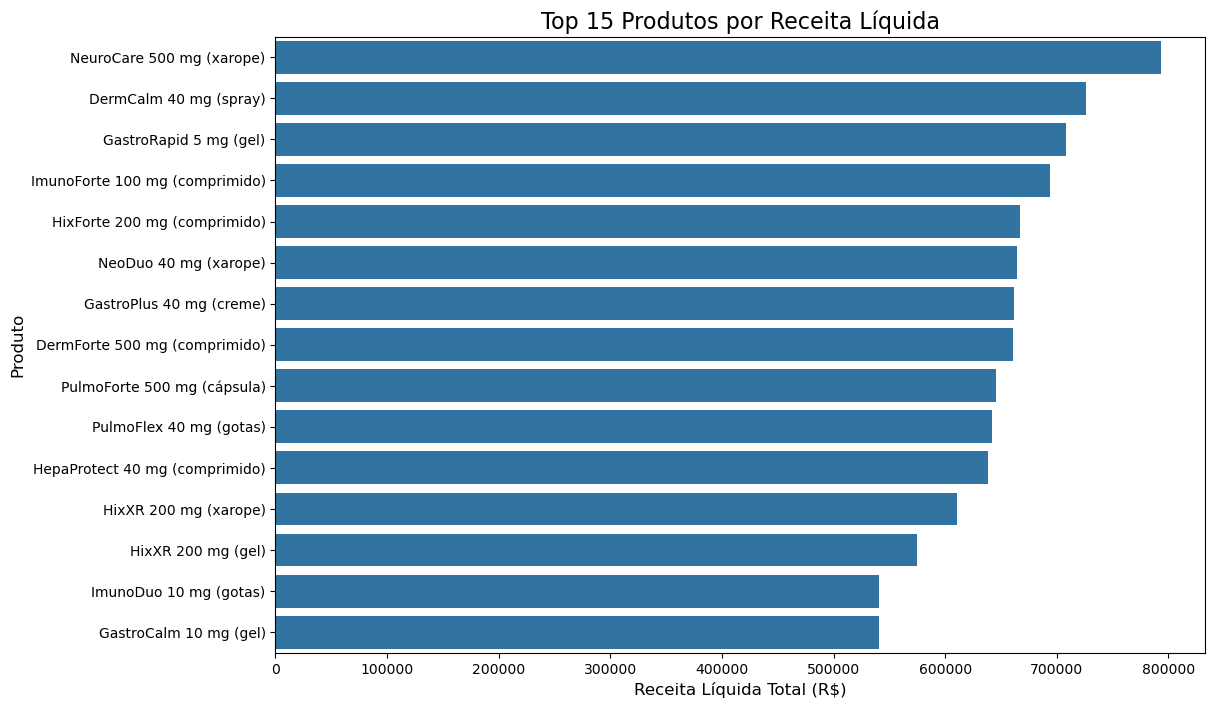

In [64]:
plt.figure(figsize=(12, 8))
sns.barplot(
    x=produto_maior_receita.head(15).values, 
    y=produto_maior_receita.head(15).index, 
    
)
plt.title('Top 15 Produtos por Receita Líquida', fontsize=16)
plt.xlabel('Receita Líquida Total (R$)', fontsize=12)
plt.ylabel('Produto', fontsize=12)
plt.show()

### Análise de Desempenho de Produtos

Nesta seção, foi realizada uma análise aprofundada do portfólio de produtos para entender quais itens são os principais direcionadores de negócio. A análise foi dividida em duas métricas chave: Volume de Vendas (unidades vendidas) e Rentabilidade (receita líquida).

#### Análise de Volume (Produtos Mais Populares)
* **Pergunta de Negócio:** "De qual produto vendemos o maior volume total de itens?"
* **Métrica Utilizada:** Soma da quantidade de unidades vendidas (`.groupby()['qtd'].sum()`).
* **Principal Insight:** O produto **"HepaDuo 40 mg (gel)"** se destaca como o líder absoluto em volume, com um total de **5.131 unidades** vendidas, confirmando sua posição como um item de massa e de alta popularidade.

#### Análise de Rentabilidade (Produtos Mais Lucrativos)
* **Pergunta de Negócio:** "Qual produto gera mais dinheiro para a empresa?"
* **Métrica Utilizada:** Soma da receita líquida por produto (`.groupby()['receita_liquida'].sum()`).
* **Principal Insight:** O produto mais rentável é o **"NeuroCare 500 mg (xarope)"**, responsável por mais de **R$ 793 mil** em receita, sendo o principal motor financeiro do portfólio.

#### Conclusão Estratégica e *Insight* Cruzado
A comparação entre as duas análises revela a conclusão mais importante desta etapa:

> **O produto de maior volume ("HepaDuo 40 mg") não é o mais rentável.** Na verdade, ele figura entre os que menos geram receita para a companhia.

Essa descoberta demonstra um claro perfil de mix de produtos:
* **Produtos de Volume:** Itens como o "HepaDuo" possuem alta popularidade e são essenciais para o volume de operações e presença de mercado, mas contribuem menos para o resultado financeiro.
* **Produtos de Valor:** Itens como o "NeuroCare" possuem uma receita por unidade muito superior e são os verdadeiros pilares financeiros da empresa, mesmo que vendidos em menor volume.

Esta conclusão tem implicações diretas para estratégias de marketing, gestão de estoque e precificação.

In [65]:
# Contagem de vendas por UF com os dados limpos
uf_por_numero_vendas_atualizado = dfcompleto.groupby('uf_vendas', observed=True)['produto_id'].count().sort_values(ascending=False)
print(uf_por_numero_vendas_atualizado.head())

uf_vendas
RS    2158
SP    1863
MG    1745
SC    1729
DF    1623
Name: produto_id, dtype: int64


#  Análise Exploratória de Vendas (EDA)

Nesta seção, iniciamos a análise exploratória do DataFrame `dfcompleto` para entender os principais direcionadores de negócio. Focamos em duas dimensões chave: **Produto** e **Região Geográfica (UF)**.

##  Análise de Desempenho de Produtos

A análise do portfólio de produtos foi dividida em métricas de Volume (unidades vendidas) e Rentabilidade (receita líquida).

* **Principal Insight de Volume (Unidades):** O produto **"HepaDuo 40 mg (gel)"** se destaca como o líder em volume, com um total de **5.131 unidades** vendidas, confirmando sua posição como um item de massa.

* **Principal Insight de Rentabilidade (Receita):** O produto mais rentável é o **"NeuroCare 500 mg (xarope)"**, responsável por mais de **R$ 793 mil** em receita, sendo o principal motor financeiro do portfólio.

###  Conclusão Estratégica (Produtos)
A descoberta mais importante é a divergência entre volume e rentabilidade. O produto de maior volume (`HepaDuo`) figura entre os que menos geram receita (aprox. **R$ 263 mil**). Isso demonstra um claro perfil de mix de produtos de "Volume" vs. "Valor".

---

##  Análise por Região Geográfica (UF)

A análise geográfica buscou entender onde nossas vendas estão concentradas.

* **Principal Insight de Frequência (Nº de Vendas):** O **Rio Grande do Sul (RS)** se confirmou como o estado com o maior número de transações, totalizando **2.158 vendas**, seguido por São Paulo (SP) com **1.863**.

* **Principal Insight de Rentabilidade (Receita):** O **Rio Grande do Sul (RS)** também lidera como o estado que mais gera receita, com um faturamento de mais de **R$ 2.31 milhões**, à frente de São Paulo (SP), com **R$ 2.07 milhões**.

###  Conclusão Estratégica (Regiões)
As duas métricas confirmam que o **Rio Grande do Sul (RS) é o principal e mais importante mercado para a empresa**, liderando tanto em volume de operações quanto em valor financeiro.

## Subplot

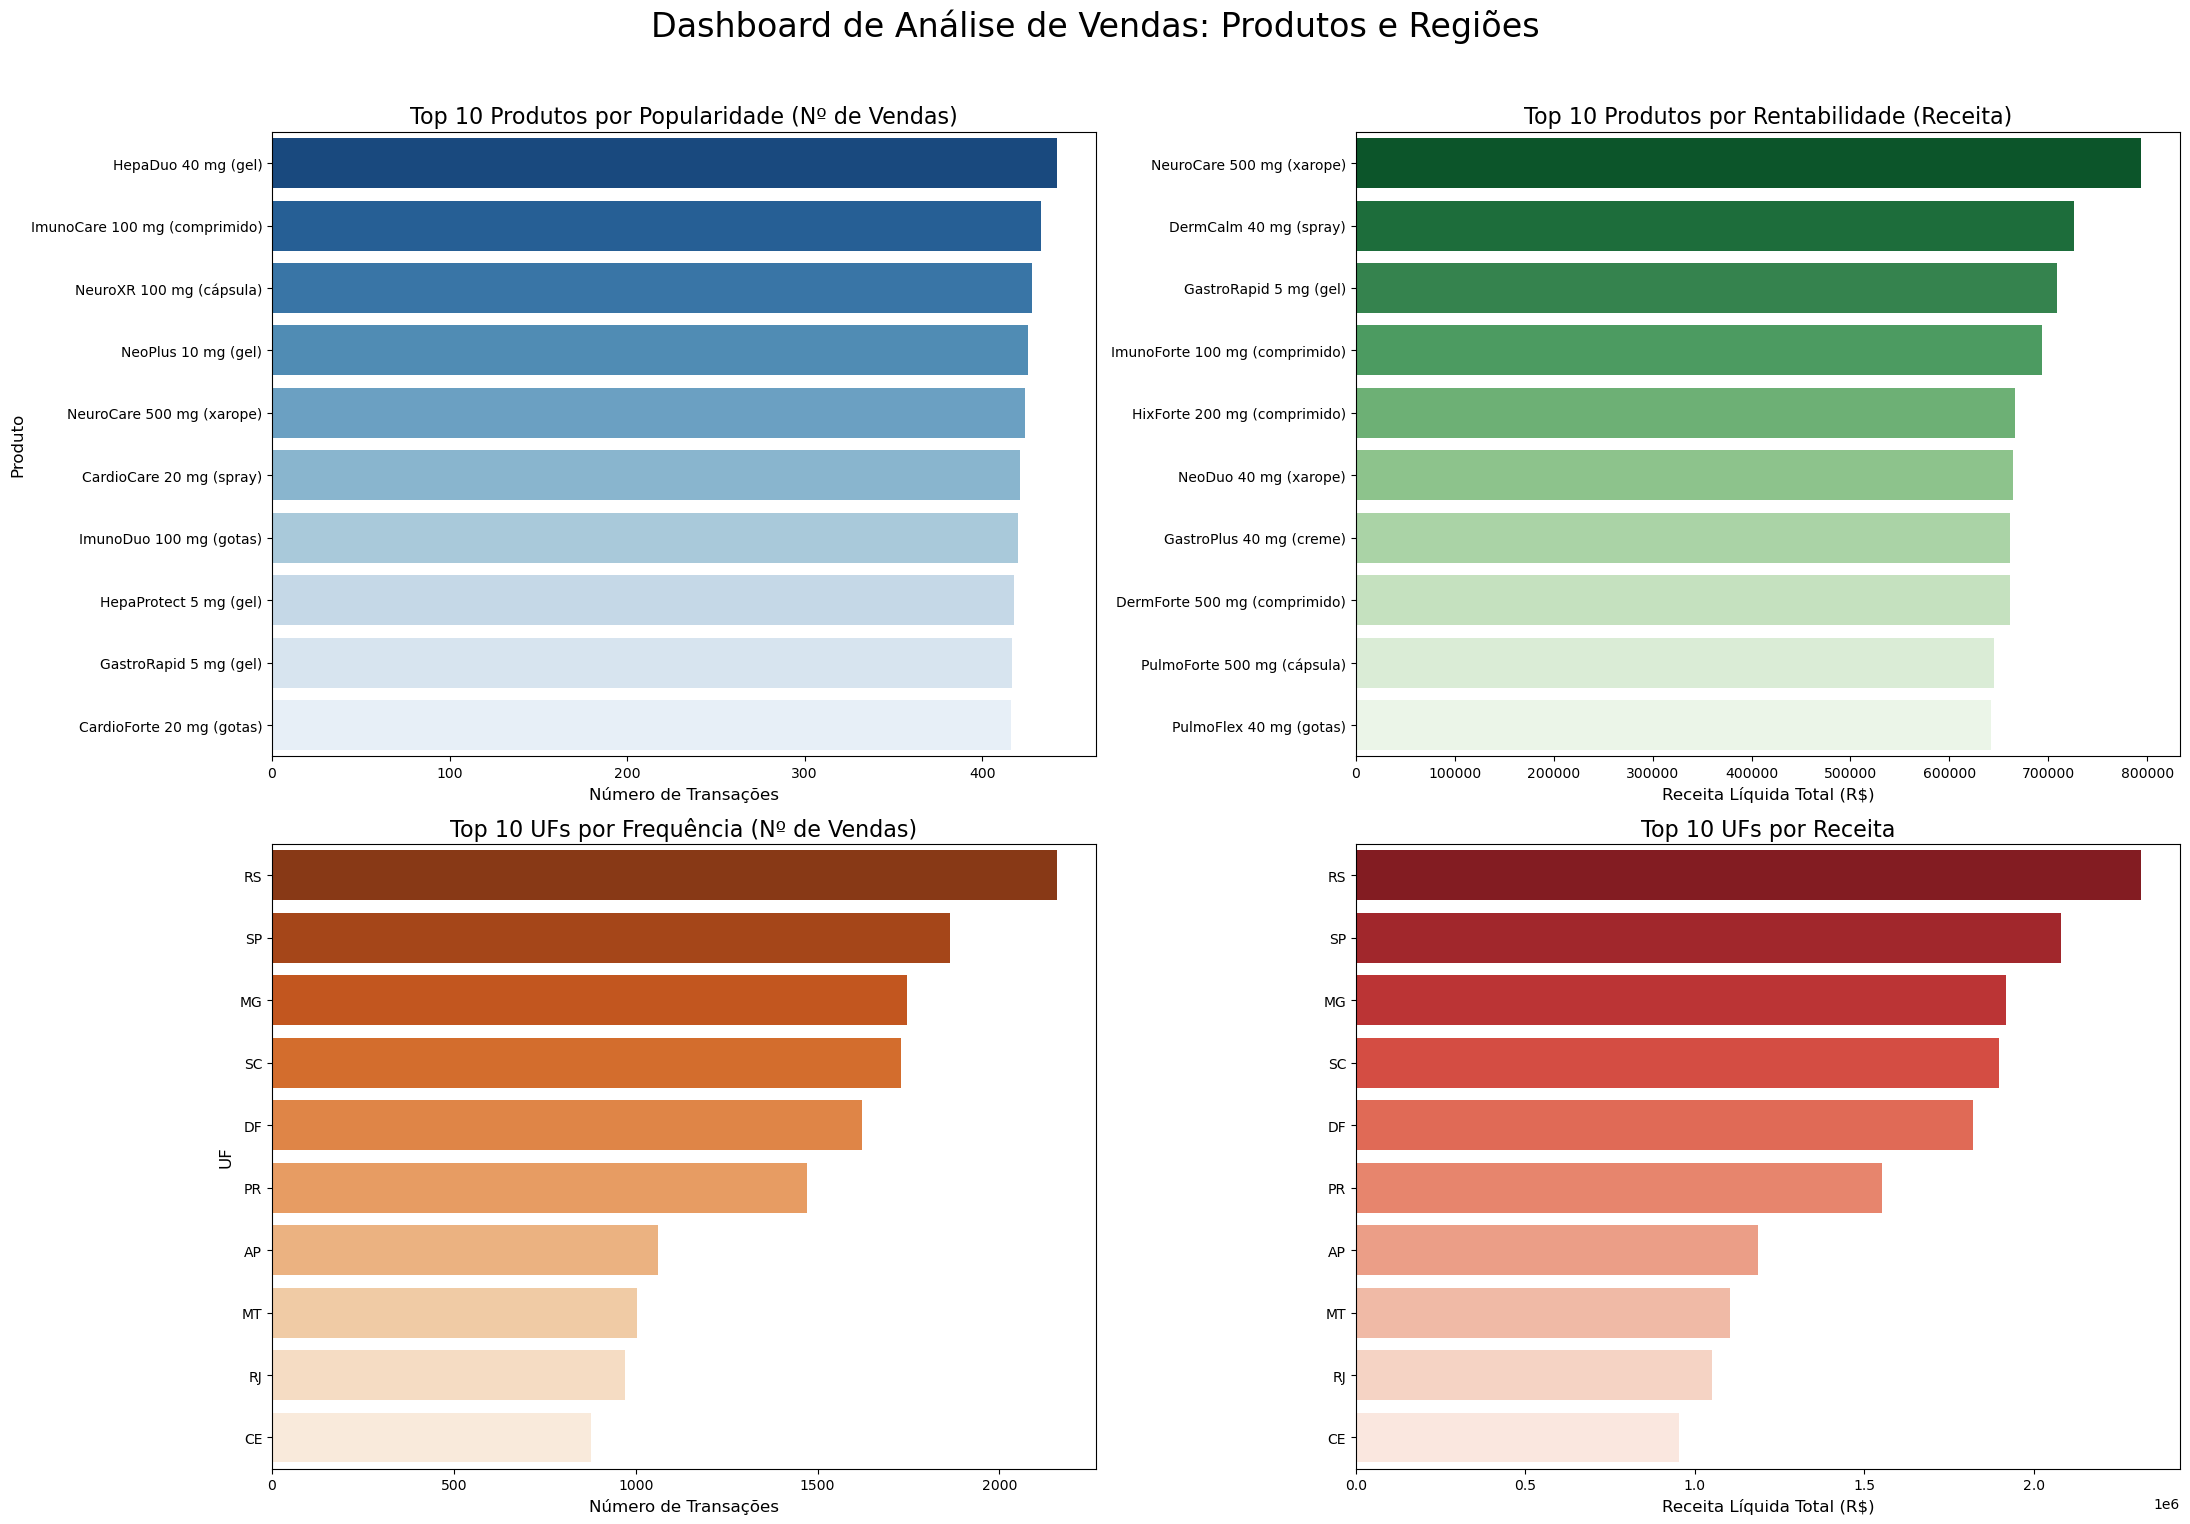

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suprimindo os avisos do Seaborn para uma saída mais limpa
warnings.filterwarnings('ignore', category=FutureWarning)


# Análise de Produtos
produto_por_numero_vendas = dfcompleto.groupby('produto_nome_produto', observed=True)['produto_id'].count().sort_values(ascending=False)
produto_maior_receita = dfcompleto.groupby('produto_nome_produto', observed=True)['receita_liquida'].sum().sort_values(ascending=False)

# Análise de Regiões (UF)
uf_por_numero_vendas = dfcompleto.groupby('uf_vendas', observed=True)['produto_id'].count().sort_values(ascending=False)
uf_maior_receita = dfcompleto.groupby('uf_vendas', observed=True)['receita_liquida'].sum().sort_values(ascending=False)



# 2. CRIANDO A FIGURA E OS SUBPLOTS (GRADE 2x2)

fig, axes = plt.subplots(2, 2, figsize=(22, 16))
fig.suptitle('Dashboard de Análise de Vendas: Produtos e Regiões', fontsize=24)


# GRÁFICO 1: Produtos por Popularidade (Linha 0, Coluna 0) 
sns.barplot(x=produto_por_numero_vendas.head(10).values, y=produto_por_numero_vendas.head(10).index, palette='Blues_r', ax=axes[0, 0], hue=produto_por_numero_vendas.head(10).index, legend=False)
axes[0, 0].set_title('Top 10 Produtos por Popularidade (Nº de Vendas)', fontsize=16)
axes[0, 0].set_xlabel('Número de Transações', fontsize=12)
axes[0, 0].set_ylabel('Produto', fontsize=12)

#  GRÁFICO 2: Produtos por Rentabilidade (Linha 0, Coluna 1) 
sns.barplot(x=produto_maior_receita.head(10).values, y=produto_maior_receita.head(10).index, palette='Greens_r', ax=axes[0, 1], hue=produto_maior_receita.head(10).index, legend=False)
axes[0, 1].set_title('Top 10 Produtos por Rentabilidade (Receita)', fontsize=16)
axes[0, 1].set_xlabel('Receita Líquida Total (R$)', fontsize=12)
axes[0, 1].set_ylabel('')

#  GRÁFICO 3: UFs por Frequência (Linha 1, Coluna 0) 
sns.barplot(x=uf_por_numero_vendas.head(10).values, y=uf_por_numero_vendas.head(10).index, palette='Oranges_r', ax=axes[1, 0], hue=uf_por_numero_vendas.head(10).index, legend=False)
axes[1, 0].set_title('Top 10 UFs por Frequência (Nº de Vendas)', fontsize=16)
axes[1, 0].set_xlabel('Número de Transações', fontsize=12)
axes[1, 0].set_ylabel('UF', fontsize=12)

#  GRÁFICO 4: UFs por Receita (Linha 1, Coluna 1) 
sns.barplot(x=uf_maior_receita.head(10).values, y=uf_maior_receita.head(10).index, palette='Reds_r', ax=axes[1, 1], hue=uf_maior_receita.head(10).index, legend=False)
axes[1, 1].set_title('Top 10 UFs por Receita', fontsize=16)
axes[1, 1].set_xlabel('Receita Líquida Total (R$)', fontsize=12)
axes[1, 1].set_ylabel('')


plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()

# 8. Conclusões da Análise Exploratória (Dashboard)

O dashboard visual acima consolida as análises de desempenho por produto e por região, permitindo a extração das seguintes conclusões estratégicas sobre o negócio:

### Principais Insights

* **Divergência entre Popularidade e Rentabilidade de Produtos:** A análise revela um claro perfil de mix de produtos. O produto mais **popular** em número de vendas (o mais frequente) não é o mesmo que gera a maior **receita**. Isso indica a coexistência de:
    * **Produtos de Volume:** Itens com alta frequência de compra que garantem a presença no mercado.
    * **Produtos de Valor:** Itens que, mesmo com menos transações, são os verdadeiros motores financeiros da empresa.

* **Domínio do Principal Mercado (RS):** Fica evidente que o **Rio Grande do Sul (RS)** é o mercado mais importante para a empresa. Ele lidera de forma consistente tanto em **número de transações** realizadas quanto em **receita líquida total** gerada, superando os demais estados em ambas as métricas chave.

* **Perfis de Mercado Distintos:** A combinação das análises sugere perfis de mercado diferentes. Enquanto o RS se destaca como um mercado de alto volume e alto valor, outros estados, como São Paulo (SP), mostram um alto número de transações, mas uma receita proporcionalmente menor em comparação ao líder. Isso pode indicar uma concentração de vendas de produtos de menor valor médio em SP.

## Receita por Cliente

In [67]:
receita_por_cliente = dfcompleto[['nome_cliente', 'receita_liquida']].groupby('nome_cliente').sum().receita_liquida.sort_values(ascending=False)
receita_por_cliente

nome_cliente
Rede Bem+Saúde                 1987220.58
Farmácia São José              1972273.08
Farmácia Preço Justo           1718025.64
Farmácia Boa Saúde             1681012.69
Farmácia Esperança             1645543.16
Rede Popular                   1611080.60
Rede Descontão                 1525993.37
Hospital N. Sra. das Graças    1440687.33
Farmácia Do Povo               1363073.37
Rede MaxFarma                  1349130.78
Hospital Esperança             1341773.77
Rede MaisVida                  1202059.58
Clínica Onco+                   872177.01
Hospital São Lucas              759198.19
Farmácia Modelo                 750597.59
Hospital Central                700159.89
Clínica Dermacare               691593.05
Dist. UniMed                    665095.14
Clínica Vitalis                 452398.47
Dist. BrasilPharma              445977.90
Clínica Vida Plena              442910.15
Hospital Santa Clara            386400.07
Clínica CardioCenter            380269.94
Dist. Farmalog       

In [68]:
display(receita_por_cliente.head())

nome_cliente
Rede Bem+Saúde          1987220.58
Farmácia São José       1972273.08
Farmácia Preço Justo    1718025.64
Farmácia Boa Saúde      1681012.69
Farmácia Esperança      1645543.16
Name: receita_liquida, dtype: float64

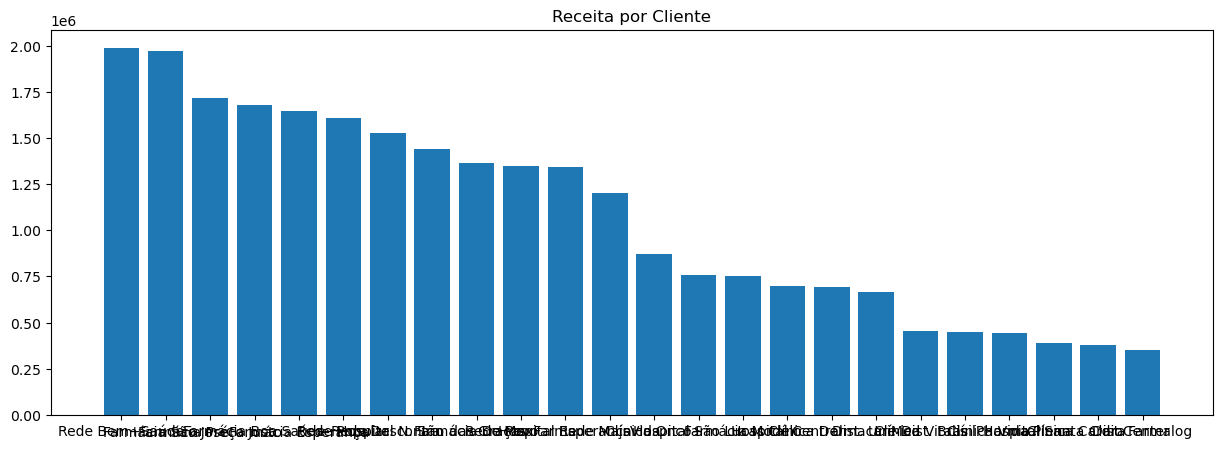

In [69]:
plt.figure(figsize=(15,5))
plt.bar(receita_por_cliente.index, receita_por_cliente.values)
plt.title('Receita por Cliente')
plt.show()

In [70]:
receita_acumulada = receita_por_cliente.cumsum()/receita_por_cliente.sum()
receita_acumulada[receita_acumulada<0.60].count()/receita_acumulada.count()

np.float64(0.375)

In [71]:
# Contando o número TOTAL de clientes únicos em todo o projeto
total_clientes = dfcompleto['nome_cliente'].nunique()

print(f"O número total de clientes únicos no seu DataFrame completo é: {total_clientes}")

O número total de clientes únicos no seu DataFrame completo é: 24


In [72]:
import pandas as pd
top_9_clientes = receita_acumulada.head(9)

#Convertendo o índice para um DataFrame para uma visualização limpa
df_top_9_clientes = pd.DataFrame(top_9_clientes.index)

#Renomeando a coluna para dar um título
df_top_9_clientes.columns = ['Top 9 Clientes Mais Importantes']

#Ajustando o índice para começar em 1 em vez de 0
df_top_9_clientes.index = df_top_9_clientes.index + 1

print("--- Lista dos 9 Clientes Mais Estratégicos ---")
display(df_top_9_clientes)

--- Lista dos 9 Clientes Mais Estratégicos ---


,Top 9 Clientes Mais Importantes
1,Rede Bem+Saúde
2,Farmácia São José
3,Farmácia Preço Justo
4,Farmácia Boa Saúde
5,Farmácia Esperança
6,Rede Popular
7,Rede Descontão
8,Hospital N. Sra. das Graças
9,Farmácia Do Povo


## Pareto

C:\Users\Windows\AppData\Local\Temp\ipykernel_12748\4056459587.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center", fontsize=10)


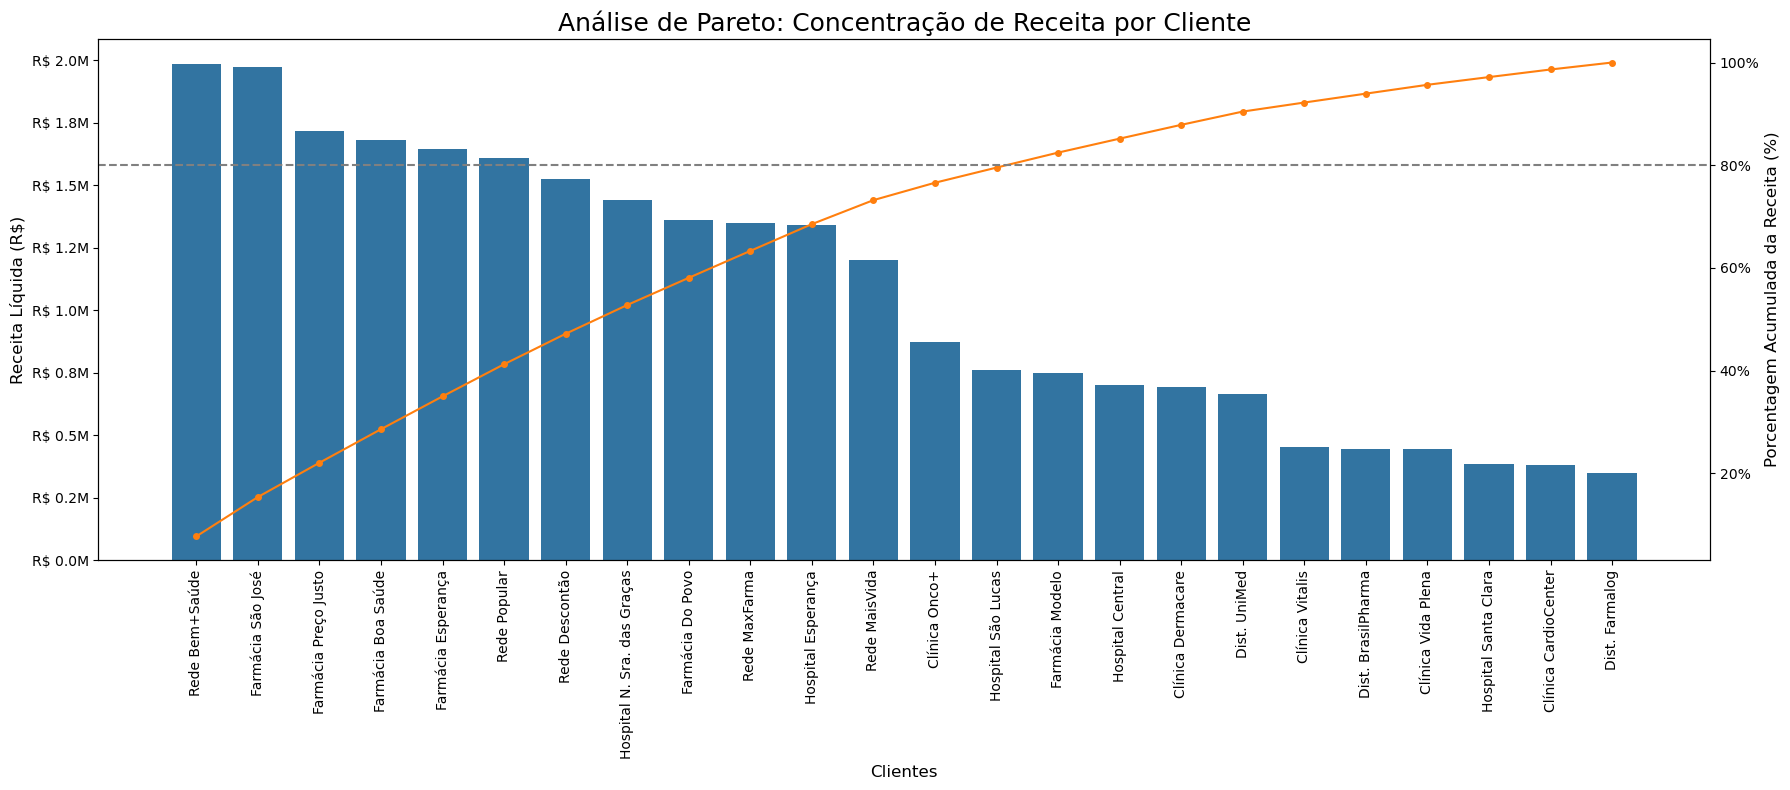

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter, FuncFormatter

# Garante que os dados estejam ordenados pela receita para o Pareto funcionar
receita_por_cliente = dfcompleto.groupby('nome_cliente')['receita_liquida'].sum().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(18, 8))

# 1. Gráfico de Barras (Receita por Cliente)
# Usamos o Seaborn para um visual mais agradável
sns.barplot(x=receita_por_cliente.index, y=receita_por_cliente.values, color='C0', ax=ax)
ax.set_ylabel('Receita Líquida (R$)', fontsize=12)

# Formatando o eixo Y para parecer com moeda
formatter = FuncFormatter(lambda y, pos: f'R$ {y/1e6:.1f}M')
ax.yaxis.set_major_formatter(formatter)

# 2. Rotação dos Rótulos do Eixo X (A Principal Correção)
# Giramos os nomes dos clientes em 90 graus para que não se sobreponham
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center", fontsize=10)
ax.set_xlabel('Clientes', fontsize=12)

ax2 = ax.twinx()

# Calculamos e plotamos a porcentagem acumulada
receita_acumulada_pct = receita_por_cliente.values.cumsum() / receita_por_cliente.values.sum() * 100
ax2.plot(receita_por_cliente.index, receita_acumulada_pct, color='C1', marker='o', ms=4)

# Formatando o segundo eixo Y como porcentagem
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.set_ylabel('Porcentagem Acumulada da Receita (%)', fontsize=12)

# Adicionando uma linha de referência para os 80% (Princípio de Pareto)
ax2.axhline(80, color='gray', linestyle='--')

ax.set_title('Análise de Pareto: Concentração de Receita por Cliente', fontsize=18)
plt.grid(False) 
plt.tight_layout()
plt.show()

C:\Users\Windows\AppData\Local\Temp\ipykernel_12748\3088173345.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=12)


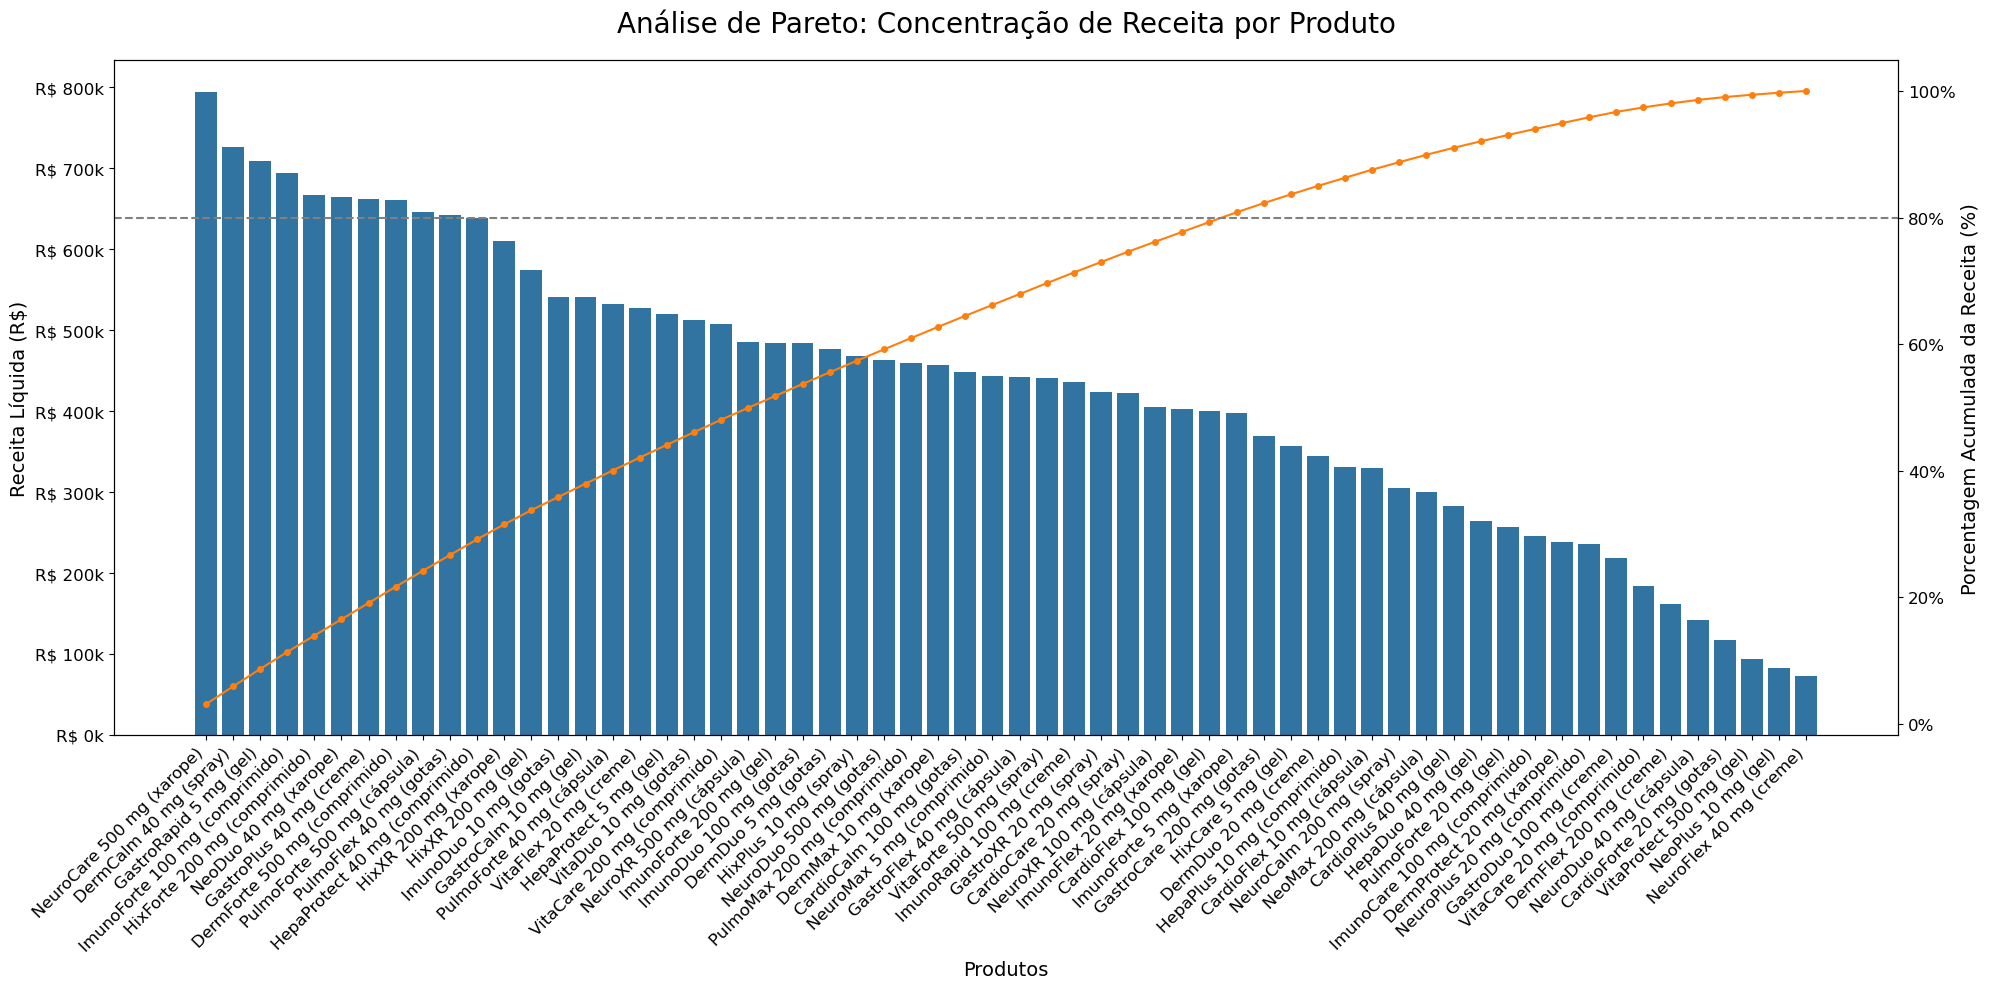

In [74]:
receita_por_produto = dfcompleto.groupby('produto_nome_produto')['receita_liquida'].sum().sort_values(ascending=False)

# Calculamos a porcentagem acumulada da receita
receita_acumulada_produto_pct = receita_por_produto.values.cumsum() / receita_por_produto.values.sum() * 100


#Criação do Gráfico de Pareto ---
fig, ax = plt.subplots(figsize=(20, 10))

# Gráfico de Barras (Receita por Produto)
sns.barplot(x=receita_por_produto.index, y=receita_por_produto.values, color='C0', ax=ax)
ax.set_ylabel('Receita Líquida (R$)', fontsize=14)
ax.tick_params(axis='y', labelsize=12)

formatter = FuncFormatter(lambda y, pos: f'R$ {y/1e3:.0f}k') # Formata em milhares (ex: R$ 800k)
ax.yaxis.set_major_formatter(formatter)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=12)
ax.set_xlabel('Produtos', fontsize=14)

ax2 = ax.twinx()
ax2.plot(receita_por_produto.index, receita_acumulada_produto_pct, color='C1', marker='o', ms=4)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.set_ylabel('Porcentagem Acumulada da Receita (%)', fontsize=14)
ax2.tick_params(axis='y', labelsize=12)

# Linha de referência para os 80% (Princípio de Pareto)
ax2.axhline(80, color='gray', linestyle='--')
ax.set_title('Análise de Pareto: Concentração de Receita por Produto', fontsize=20, pad=20)
plt.grid(False)
plt.tight_layout()
plt.show()

In [75]:
# Calculando a receita por produto e a receita acumulada em porcentagem
receita_por_produto = dfcompleto.groupby('produto_nome_produto')['receita_liquida'].sum().sort_values(ascending=False)
receita_acumulada_produto = receita_por_produto.cumsum() / receita_por_produto.sum()

# Filtro para ver quantos produtos representam 80% da receita
produtos_top_80_porcento = receita_acumulada_produto[receita_acumulada_produto <= 0.80]
total_produtos = dfcompleto['produto_nome_produto'].nunique()

print(f"Número total de produtos únicos: {total_produtos}")
print(f"Número de produtos que representam 80% da receita: {len(produtos_top_80_porcento)}")
print(f"Percentual de produtos que representam 80% da receita: {len(produtos_top_80_porcento)/total_produtos:.2%}")

Número total de produtos únicos: 60
Número de produtos que representam 80% da receita: 38
Percentual de produtos que representam 80% da receita: 63.33%


In [76]:
# Cálculo Final do Pareto de Clientes ---
receita_por_cliente = dfcompleto.groupby('nome_cliente')['receita_liquida'].sum().sort_values(ascending=False)
receita_acumulada_clientes = receita_por_cliente.cumsum() / receita_por_cliente.sum()

# Filtro para ver quantos clientes representam 80% da receita
clientes_top_80_porcento = receita_acumulada_clientes[receita_acumulada_clientes <= 0.80]
total_clientes = dfcompleto['nome_cliente'].nunique()

print(f"Número total de clientes: {total_clientes}")
print(f"Número de clientes que representam 80% da receita: {len(clientes_top_80_porcento)}")
print(f"Percentual de clientes que representam 80% da receita: {len(clientes_top_80_porcento)/total_clientes:.2%}")

Número total de clientes: 24
Número de clientes que representam 80% da receita: 14
Percentual de clientes que representam 80% da receita: 58.33%


# 9. Conclusão Final da Análise Exploratória de Dados (EDA)

Após um processo completo de limpeza, preparação e integração de dados, a análise exploratória do DataFrame `dfcompleto` revelou os seguintes insights estratégicos sobre o negócio. Esta seção consolida as principais descobertas.

## 9.1. Análise de Desempenho de Vendas

* **Perfil Geográfico (Domínio de Mercado):** A análise confirmou que o **Rio Grande do Sul (RS)** é o principal mercado da empresa, liderando de forma consistente tanto em número de transações (**2.158 vendas**) quanto em receita líquida total (**R$ 2.31 milhões**).

* **Perfil de Produtos (Volume vs. Valor):** A análise demonstrou um claro mix de produtos. O item mais vendido em unidades (`HepaDuo 40 mg (gel)`, com 5.131 unidades) não é o mais rentável. O principal motor financeiro da empresa é o `NeuroCare 500 mg (xarope)` (R$ 793 mil em receita), evidenciando a necessidade de estratégias distintas para produtos de "volume" e produtos de "valor".

## 9.2. Análise de Concentração de Negócio (Princípio de Pareto)

A análise de Pareto mostrou como a receita está distribuída entre clientes e produtos, confirmando o "Princípio 80/20".

* **Concentração em Clientes:** A receita é altamente concentrada na base de clientes. Foi identificado que **14 clientes (58.33% do total de 24) são responsáveis por 80% de toda a receita**, demonstrando uma alta dependência de um grupo seleto de clientes "VIP".

* **Concentração em Produtos:** A receita é moderadamente concentrada. A análise comprovou que **38 produtos (63.33% do portfólio total) são responsáveis por 80% de toda a receita da empresa**.

## 9.3. Análise do Ciclo de Pagamentos e Comportamento do Cliente

A investigação do tempo de pagamento revelou um ciclo médio de ~30 dias e gerou os insights mais profundos do projeto.

* **O *Insight* do "Viés de Volume":** Uma análise inicial baseada na contagem absoluta de faturas em atraso mostrou-se enganosa. Clientes de grande volume (ex: "Farmácia São José") pareciam ser os piores pagadores, mas isso era um viés causado pelo seu alto número de transações.

* **A Métrica Corrigida (Percentual de Atraso):** Para obter uma visão precisa do **comportamento**, a métrica foi ajustada para o **percentual de faturas pagas com atraso**. Esta nova análise revelou o verdadeiro perfil de risco.

* **O Fator Determinante (Perfil do Cliente):** A análise corrigida provou que o fator decisivo para pagamentos lentos é o **tipo de cliente**. Os **Distribuidores e Clínicas** apresentaram o maior percentual de faturas pagas com atraso, representando o maior risco ao fluxo de caixa, enquanto os grandes clientes de varejo (farmácias) se mostraram, proporcionalmente, mais consistentes.

## 9.4. Conclusão Estratégica Geral

A saúde do negócio é sustentada por um núcleo de clientes e produtos de alto valor, com uma forte concentração geográfica no Rio Grande do Sul. O principal risco ao fluxo de caixa não vem dos maiores clientes, mas sim do comportamento de pagamento de segmentos específicos como Distribuidores e Clínicas. As estratégias futuras devem focar em proteger e expandir o relacionamento com os clientes VIP, otimizar o mix de produtos por região e criar políticas de crédito diferenciadas por tipo de cliente.

## Existe alguma receita usando a combinação entre PRODUTO e UF que mais se destaca?

In [77]:
# Só pegar as 3 colunas necessarias que no caso é produto, uf e receita para sabermos os valores
combinacao_produto_uf = dfcompleto.groupby(['produto_nome_produto', 'uf_vendas'])['receita_liquida'].sum().sort_values(ascending=False)
print("Top 15 Combinações de Produto & UF por Receita")
display(combinacao_produto_uf.head(15))

Top 15 Combinações de Produto & UF por Receita


produto_nome_produto            uf_vendas
NeuroCare 500 mg (xarope)       SP           92610.52
ImunoForte 100 mg (comprimido)  SP           89784.10
GastroPlus 40 mg (creme)        MG           75935.88
HepaProtect 40 mg (comprimido)  RS           74715.35
GastroRapid 5 mg (gel)          RS           72723.14
DermCalm 40 mg (spray)          DF           71868.98
NeuroCare 500 mg (xarope)       SC           71719.16
HixXR 200 mg (xarope)           RS           71143.75
DermCalm 40 mg (spray)          SP           70950.18
                                RS           69639.45
VitaFlex 20 mg (creme)          RS           67451.34
ImunoForte 100 mg (comprimido)  RS           65097.44
DermForte 500 mg (comprimido)   RS           63598.13
NeuroCare 500 mg (xarope)       RS           63191.90
GastroPlus 40 mg (creme)        SC           62803.96
Name: receita_liquida, dtype: float64

In [78]:
# Contando quantas vezes cada produto foi vendido em cada estado
# .size() é uma forma eficiente de contar as linhas em cada grupo
frequencia_produto_uf = dfcompleto.groupby(['uf_vendas', 'produto_nome_produto'], observed=True).size().reset_index(name='numero_de_vendas')

print("Tabela de Frequência de Vendas (Amostra):")
display(frequencia_produto_uf.sort_values(by='numero_de_vendas', ascending=False).head(10))

Tabela de Frequência de Vendas (Amostra):


,uf_vendas,produto_nome_produto,numero_de_vendas
1335,RS,GastroRapid 5 mg (gel),48
1331,RS,GastroCare 200 mg (gotas),48
1374,RS,VitaFlex 20 mg (creme),46
1345,RS,HixXR 200 mg (xarope),45
1536,SP,NeoPlus 10 mg (gel),45
1328,RS,DermMax 10 mg (xarope),45
1324,RS,DermDuo 20 mg (creme),44
1355,RS,NeoMax 200 mg (cápsula),44
1323,RS,DermCalm 40 mg (spray),44
1538,SP,NeuroCare 500 mg (xarope),44


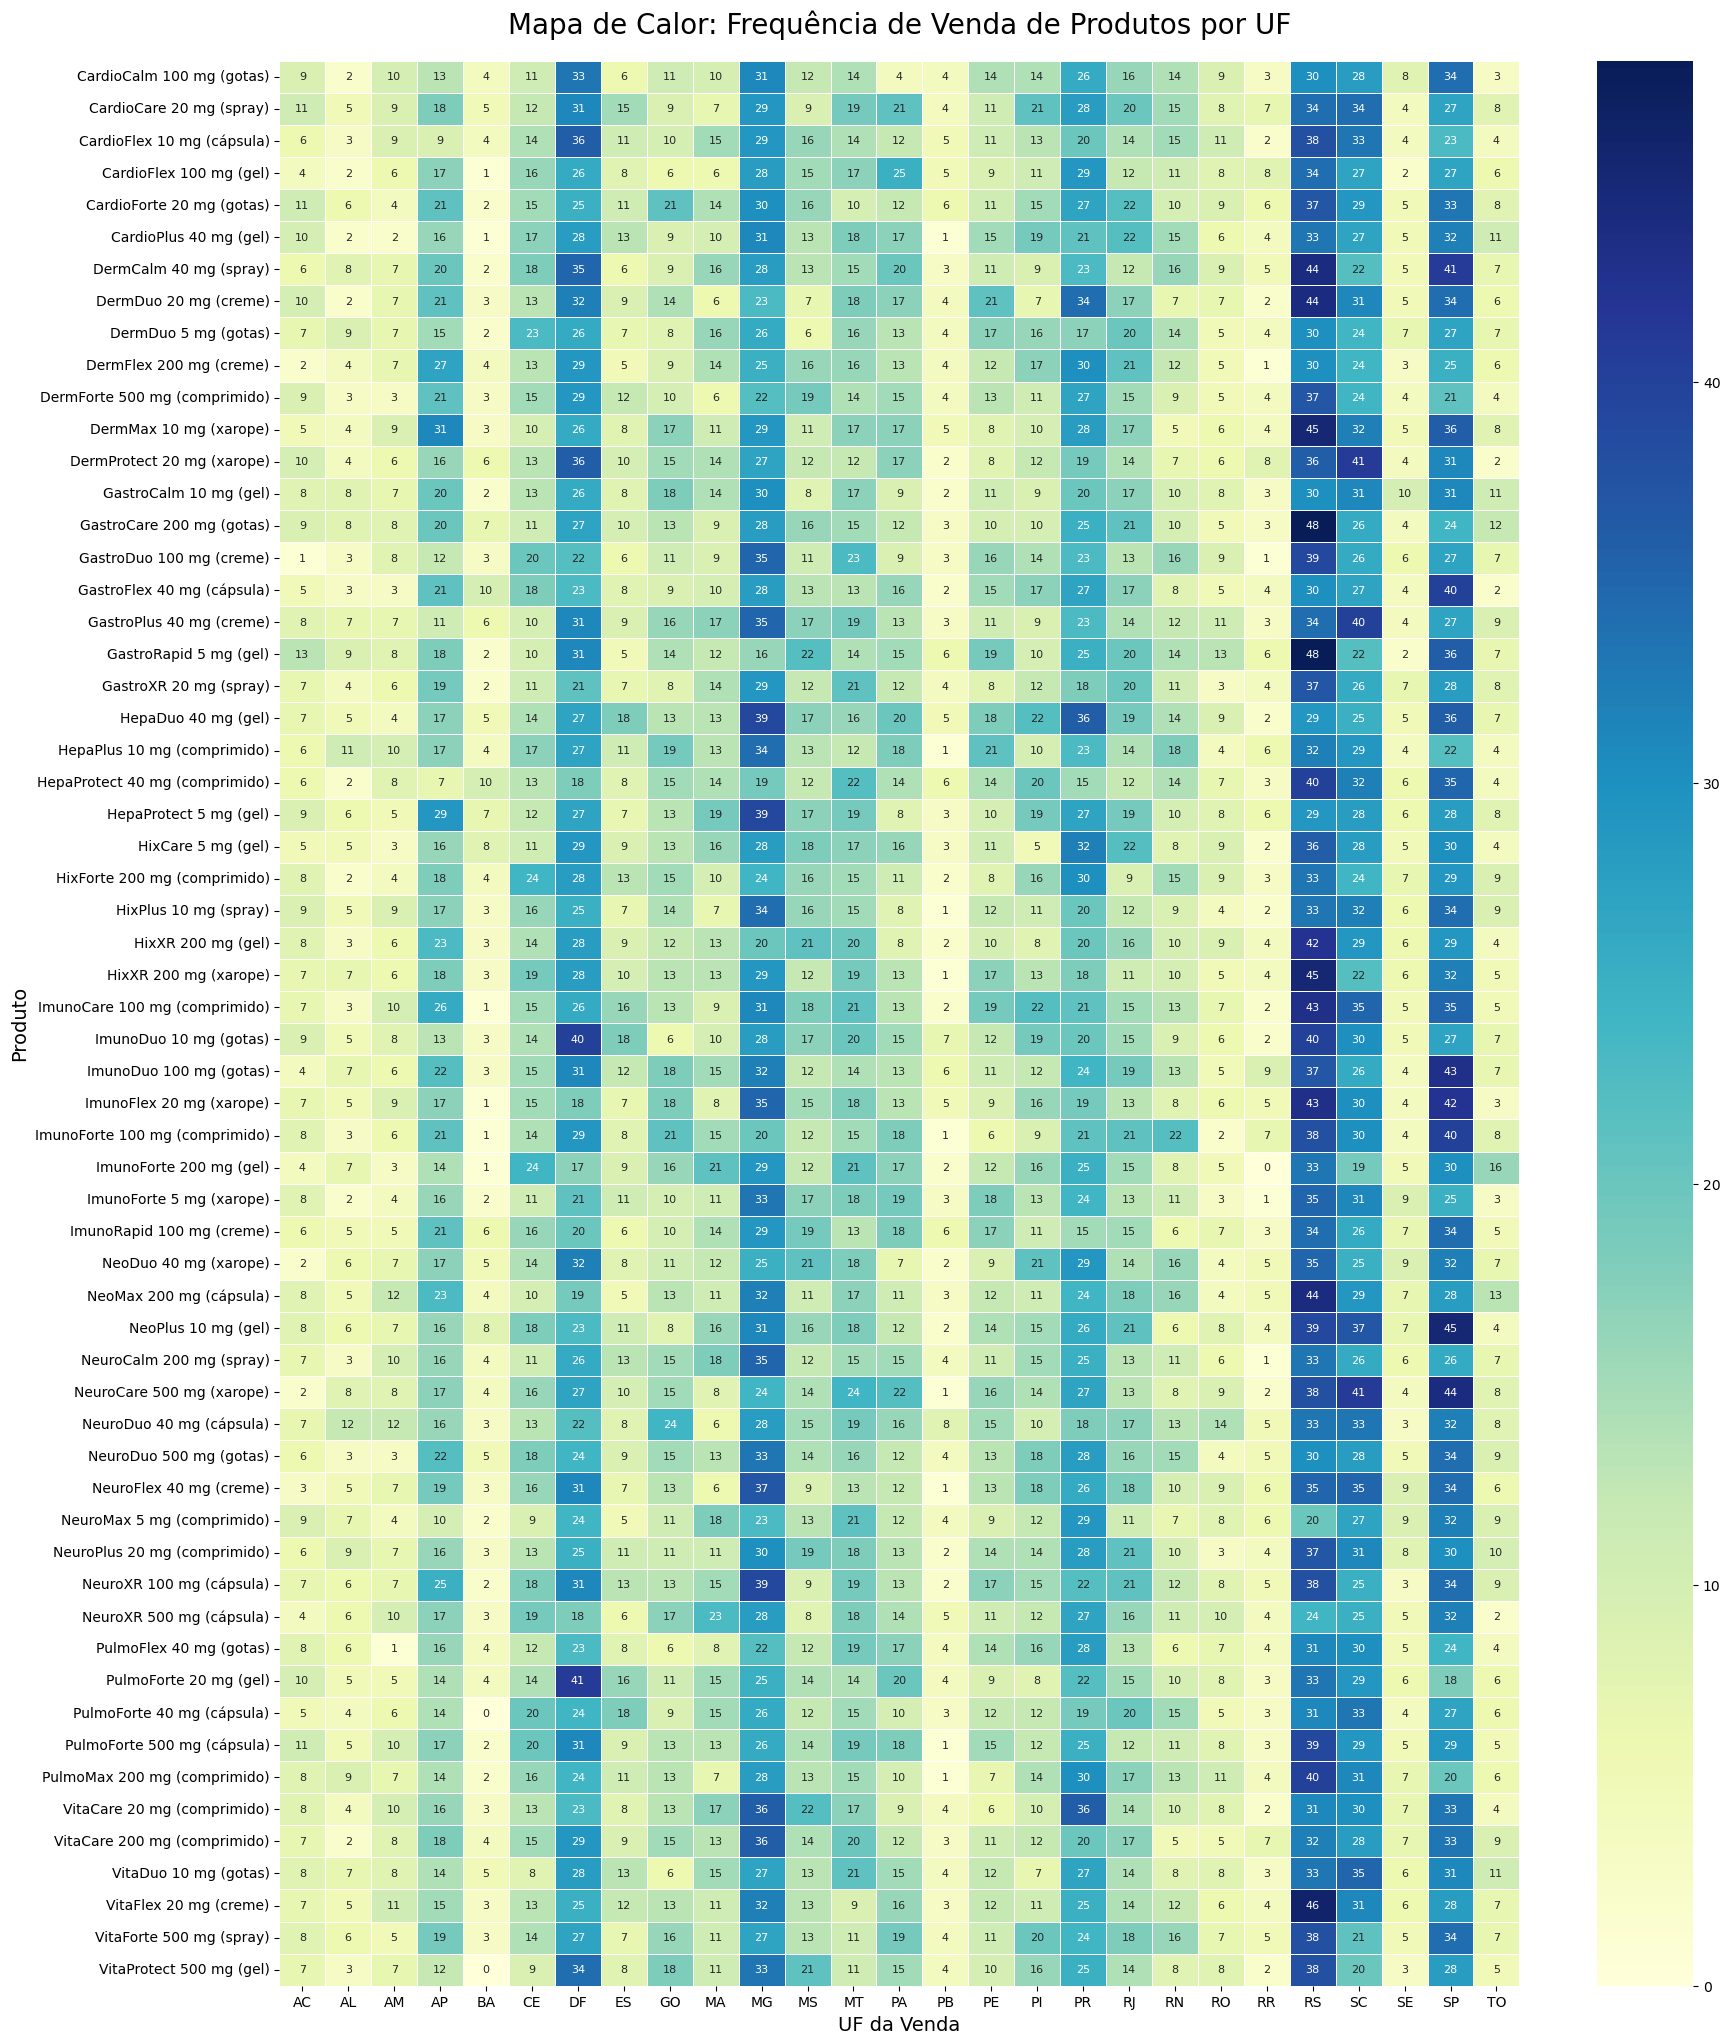

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Para criar o heatmap, primeiro precisamos 'pivotar' a tabela para o formato de matriz
matriz_frequencia = frequencia_produto_uf.pivot_table(
    index='produto_nome_produto',
    columns='uf_vendas',
    values='numero_de_vendas',
    fill_value=0 # Preenche combinações que não existem com 0
)

plt.figure(figsize=(20, 25)) # Usamos um tamanho grande para caber todos os nomes
sns.heatmap(
    matriz_frequencia,
    cmap='YlGnBu', # Paleta de cores (amarelo -> verde -> azul)
    annot=True,   # Escreve os números dentro das células
    fmt='g',      # Formato do número para evitar notação científica
    linewidths=.5,
    annot_kws={"size": 8} # Ajusta o tamanho da fonte dos números
)
plt.title('Mapa de Calor: Frequência de Venda de Produtos por UF', fontsize=20, pad=20)
plt.xlabel('UF da Venda', fontsize=14)
plt.ylabel('Produto', fontsize=14)
plt.show()

## Como Analisar o Mapa de Calor
**As células com cores mais escuras (e números maiores) representam as combinações mais fortes – os produtos mais vendidos em cada estado.**

**As células com cores claras (e números baixos ou zero) indicam produtos que vendem pouco ou nada naquela região.**

In [80]:
# Análise de Distribuição Geográfica de Produtos

# 1. Agrupamos por produto e contamos o número de UFs ÚNICAS para cada um
# A função .nunique() é a chave aqui, pois conta apenas os valores distintos.
distribuicao_geografica = dfcompleto.groupby('produto_nome_produto')['uf_vendas'].nunique().sort_values(ascending=False)

# 2. Mostramos o ranking geral dos produtos mais distribuídos
print("Ranking de Produtos por Número de UFs em que são Vendidos")
display(distribuicao_geografica.head(15))

# 3. filtro para ver apenas os que aparecem em mais de um estado
produtos_multi_estado = distribuicao_geografica[distribuicao_geografica > 1]

print("\n" + "="*50 + "\n")
print(f"Resultado: Um total de {len(produtos_multi_estado)} produtos são vendidos em mais de um estado.")

Ranking de Produtos por Número de UFs em que são Vendidos


produto_nome_produto
CardioCalm 100 mg (gotas)        27
CardioCare 20 mg (spray)         27
CardioFlex 10 mg (cápsula)       27
CardioFlex 100 mg (gel)          27
CardioForte 20 mg (gotas)        27
CardioPlus 40 mg (gel)           27
DermCalm 40 mg (spray)           27
DermDuo 20 mg (creme)            27
DermDuo 5 mg (gotas)             27
DermFlex 200 mg (creme)          27
DermForte 500 mg (comprimido)    27
DermMax 10 mg (xarope)           27
DermProtect 20 mg (xarope)       27
GastroCalm 10 mg (gel)           27
GastroCare 200 mg (gotas)        27
Name: uf_vendas, dtype: int64



Resultado: Um total de 60 produtos são vendidos em mais de um estado.


### Análise de Distribuição Geográfica de Produtos

Esta análise buscou entender o alcance nacional do nosso portfólio.

* **Principal Insight:** A análise revelou uma **distribuição geográfica quase perfeita** para a maioria dos produtos. Foi identificado que os principais itens do portfólio estão disponíveis em todas as **27 Unidades Federativas** onde a empresa opera.

* **Conclusão Estratégica:** A empresa possui uma excelente capilaridade logística. O fator determinante para o sucesso de um produto não é sua disponibilidade geográfica (alcance), mas sim sua **performance de vendas (preferência)** dentro de cada mercado. Isso reforça a importância das análises de receita e volume para entender as dinâmicas de consumo regionais.

# Análise de Tempo 

## 10. Análise do Ciclo de Pagamentos

Após a criação da métrica `tempo_pagamento`, a análise estatística inicial (`.describe()`) revelou um comportamento inesperado e muito importante: o tempo médio de pagamento da empresa é de aproximadamente **30 dias**.

Esta descoberta muda o foco da nossa análise de um modelo de "pagamento rápido" para um modelo de **gestão de prazos e recebíveis**, típico de um negócio B2B (empresa para empresa). Com base nisso, as seguintes perguntas de negócio se tornam cruciais para entender a saúde do fluxo de caixa da empresa:

1.  **Quais clientes pagam *antes* do prazo de 30 dias?**
    * *Objetivo:* Identificar os clientes mais eficientes, que contribuem positivamente para o fluxo de caixa.

2.  **Quais clientes pagam consistentemente *após* o prazo de 30 dias?**
    * *Objetivo:* Identificar os clientes que representam um maior risco de atraso ou inadimplência e que podem necessitar de uma política de cobrança mais ativa.

3.  **Qual é a extensão da "cauda longa" de pagamentos atrasados?**
    * *Objetivo:* Quantificar o impacto dos pagamentos mais demorados (ex: acima de 60, 90 dias) no capital de giro da empresa e identificar casos extremos que necessitam de atenção imediata.

As análises a seguir buscarão responder a estas três perguntas.

In [81]:
dfcompleto.tempo_pagamento.describe()

count    23489.000000
mean        29.570437
std         14.412531
min          3.000000
25%         20.000000
50%         27.000000
75%         41.000000
max         89.000000
Name: tempo_pagamento, dtype: float64

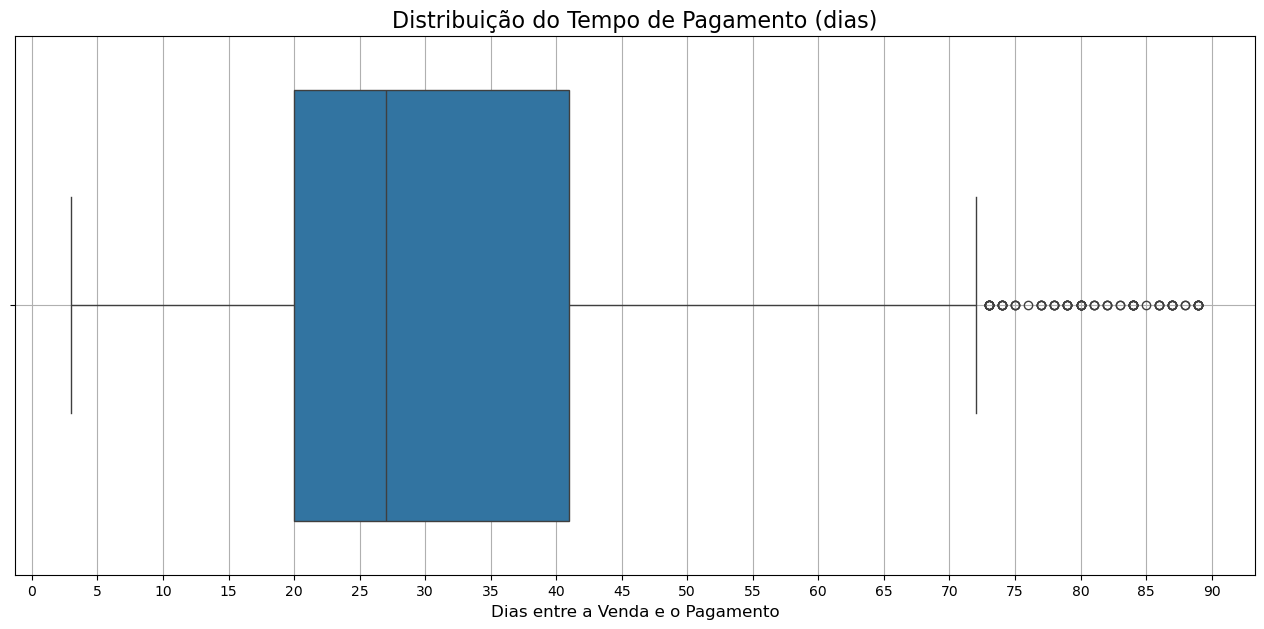

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16, 7))
sns.boxplot(x=dfcompleto['tempo_pagamento'])

plt.title('Distribuição do Tempo de Pagamento (dias)', fontsize=16)
plt.xlabel('Dias entre a Venda e o Pagamento', fontsize=12)
max_days = int(dfcompleto['tempo_pagamento'].max())
plt.xticks(range(0, max_days + 5, 5))
plt.grid(True)
plt.show()

### Análise Estatística do Ciclo de Pagamentos

A primeira etapa da análise do comportamento de pagamento foi gerar as estatísticas descritivas da coluna `tempo_pagamento` para obter uma visão geral do ciclo de recebimento da empresa.

* **Conclusão Principal:** A análise confirma que a empresa opera com um ciclo de pagamento de aproximadamente **30 dias**, com uma média de 29.6 dias e uma mediana (valor típico) de 27 dias.
* **Observações Adicionais:**
    * Existe uma alta variabilidade no comportamento dos clientes, com pagamentos variando de um mínimo de **3 dias** a um máximo de **89 dias**.
    * A distribuição dos dados mostra que 25% dos pagamentos ocorrem em até 20 dias, enquanto 25% levam mais de 41 dias, indicando diferentes perfis de clientes que devem ser investigados.

Esta análise estatística servirá de base para as visualizações subsequentes (histograma e boxplot) que explorarão essa distribuição de forma mais detalhada.

In [83]:
# PASSO 1: Filtrar todas as vendas que foram pagas em menos de 30 dias
df_pag_adiantado = dfcompleto[dfcompleto['tempo_pagamento'] < 30]

# PASSO 2: Contar quantas vezes cada cliente aparece nessa lista de 'bons pagadores'
# Isso nos mostra os clientes que mais têm o hábito de pagar adiantado
clientes_bons_pagadores = df_pag_adiantado['nome_cliente'].value_counts()

print(f"Informação: Encontramos {len(df_pag_adiantado)} vendas com pagamento adiantado (menos de 30 dias).")
print(f"Isso envolve {len(clientes_bons_pagadores)} clientes diferentes.")

print("\n--- Ranking de Clientes que Mais Pagam Adiantado (por Nº de Ocorrências) ---")
display(clientes_bons_pagadores.head(15))

Informação: Encontramos 15774 vendas com pagamento adiantado (menos de 30 dias).
Isso envolve 24 clientes diferentes.

--- Ranking de Clientes que Mais Pagam Adiantado (por Nº de Ocorrências) ---


nome_cliente
Farmácia São José              1237
Rede Bem+Saúde                 1195
Farmácia Boa Saúde             1067
Farmácia Preço Justo           1032
Rede Popular                   1020
Farmácia Esperança              995
Rede Descontão                  896
Hospital N. Sra. das Graças     862
Rede MaxFarma                   828
Farmácia Do Povo                821
Hospital Esperança              798
Rede MaisVida                   707
Clínica Onco+                   512
Hospital São Lucas              488
Farmácia Modelo                 474
Name: count, dtype: int64

In [84]:
## A "Farmácia São José" se destaca como a cliente mais consistente em pagar adiantado, com 1.237 transações pagas em menos de 30 dias. Logo em seguida vêm a "Rede Bem+Saúde" e a "Farmácia Boa Saúde".

In [85]:
# PASSO 1: Filtrar todas as vendas que foram pagas em mais de 30 dias
df_pag_atrasado = dfcompleto[dfcompleto['tempo_pagamento'] > 30]

# PASSO 2: Contar quantas vezes cada cliente aparece nessa lista de 'pagadores lentos'
clientes_maus_pagadores = df_pag_atrasado['nome_cliente'].value_counts()

print(f"Informação: Encontramos {len(df_pag_atrasado)} vendas com pagamento em atraso (mais de 30 dias).")
print(f"Isso envolve {len(clientes_maus_pagadores)} clientes diferentes.")

print("\n--- Ranking de Clientes que Mais Pagam com Atraso (por Nº de Ocorrências) ---")
display(clientes_maus_pagadores.head(15))

Informação: Encontramos 6568 vendas com pagamento em atraso (mais de 30 dias).
Isso envolve 24 clientes diferentes.

--- Ranking de Clientes que Mais Pagam com Atraso (por Nº de Ocorrências) ---


nome_cliente
Farmácia São José              512
Rede Bem+Saúde                 503
Farmácia Preço Justo           467
Farmácia Boa Saúde             415
Rede Popular                   404
Farmácia Esperança             397
Hospital N. Sra. das Graças    379
Rede Descontão                 372
Hospital Esperança             351
Farmácia Do Povo               348
Rede MaxFarma                  330
Rede MaisVida                  275
Clínica Onco+                  216
Farmácia Modelo                208
Hospital São Lucas             205
Name: count, dtype: int64

### Análise de Comportamento de Pagamento: Da Contagem Absoluta ao Percentual

Após a análise inicial que contou o número de faturas pagas com atraso (> 30 dias), foi observado um resultado contraintuitivo: os clientes com o maior número de atrasos (ex: "Farmácia São José") eram os mesmos com o maior número de pagamentos adiantados.

#### O *Insight* do "Viés de Volume"
Esta aparente contradição é explicada pelo **viés do volume total de compras**. Clientes que compram com muito mais frequência terão, naturalmente, um número absoluto maior tanto de pagamentos em dia quanto de pagamentos em atraso, o que não reflete o comportamento real.

#### A Métrica Corrigida: Percentual de Atraso
Para obter uma visão mais justa e precisa do **comportamento** de pagamento de cada cliente, é necessário criar uma nova métrica que normalize este efeito. A pergunta de negócio correta a ser respondida é:

> "Qual cliente, **proporcionalmente** ao total de suas compras, tem o maior percentual de faturas pagas com atraso?"

O código a seguir calcula exatamente essa métrica.

In [86]:
# PASSO 1: Contar o total de vendas de cada cliente
total_vendas_cliente = dfcompleto['nome_cliente'].value_counts()

# PASSO 2: Pegar a contagem de pagamentos em atraso
atrasos_por_cliente = clientes_maus_pagadores

# PASSO 3: Calcular o percentual de atraso para cada cliente e ordenar
# Dividimos o número de atrasos pelo total de vendas e multiplicamos por 100
percentual_atraso = (atrasos_por_cliente / total_vendas_cliente * 100).sort_values(ascending=False)

print("--- Ranking de Clientes por PERCENTUAL de Pagamentos em Atraso ---")
# Usamos .round(2) para formatar o resultado com 2 casas decimais
display(percentual_atraso.round(2).head(15))

--- Ranking de Clientes por PERCENTUAL de Pagamentos em Atraso ---


nome_cliente
Dist. Farmalog                 31.46
Clínica Vitalis                30.16
Dist. BrasilPharma             29.65
Farmácia Preço Justo           29.59
Farmácia Modelo                29.38
Hospital N. Sra. das Graças    29.24
Hospital Central               29.21
Dist. UniMed                   29.07
Hospital Esperança             28.98
Hospital São Lucas             28.59
Farmácia Do Povo               28.29
Rede Bem+Saúde                 28.08
Clínica Onco+                  28.05
Farmácia São José              28.01
Rede Descontão                 27.95
Name: count, dtype: float64

### Análise de Comportamento de Pagamento por Cliente

Nesta seção, aprofundamos a análise do `tempo_pagamento` para identificar o perfil dos clientes com pagamentos em atraso (> 30 dias), visando entender o risco para o fluxo de caixa.

#### O *Insight* do "Viés de Volume" e a Métrica Corrigida
Uma análise inicial baseada na **contagem absoluta** de faturas em atraso mostrou-se enganosa. Os clientes com maior volume de compras (ex: "Farmácia São José") lideravam a lista, criando um falso retrato do comportamento. Para corrigir esse viés, a métrica foi ajustada para o **percentual de faturas pagas com atraso** em relação ao total de compras de cada cliente.

#### Conclusões da Análise Percentual
A análise da métrica corrigida revelou o verdadeiro perfil de pagamento e gerou dois insights principais:

* **Os Verdadeiros "Maus Pagadores":** Foi identificado que os clientes com o pior comportamento de pagamento, em termos proporcionais, são os **Distribuidores** (como "Dist. Farmalog") e algumas **Clínicas** ("Clínica Vitalis"). Estes grupos chegam a ter **mais de 31%** de suas faturas pagas com atraso, representando o maior risco ao fluxo de caixa.

* **A "Redenção" dos Grandes Clientes:** O *insight* mais interessante é que os clientes de maior volume, como a **"Farmácia São José" e a "Rede Bem+Saúde"**, não figuram no topo da lista de piores pagadores. Eles apresentam um percentual de atraso menor que os líderes do ranking (em torno de 28%), provando que um alto número absoluto de atrasos não significava, necessariamente, o pior comportamento de pagamento.

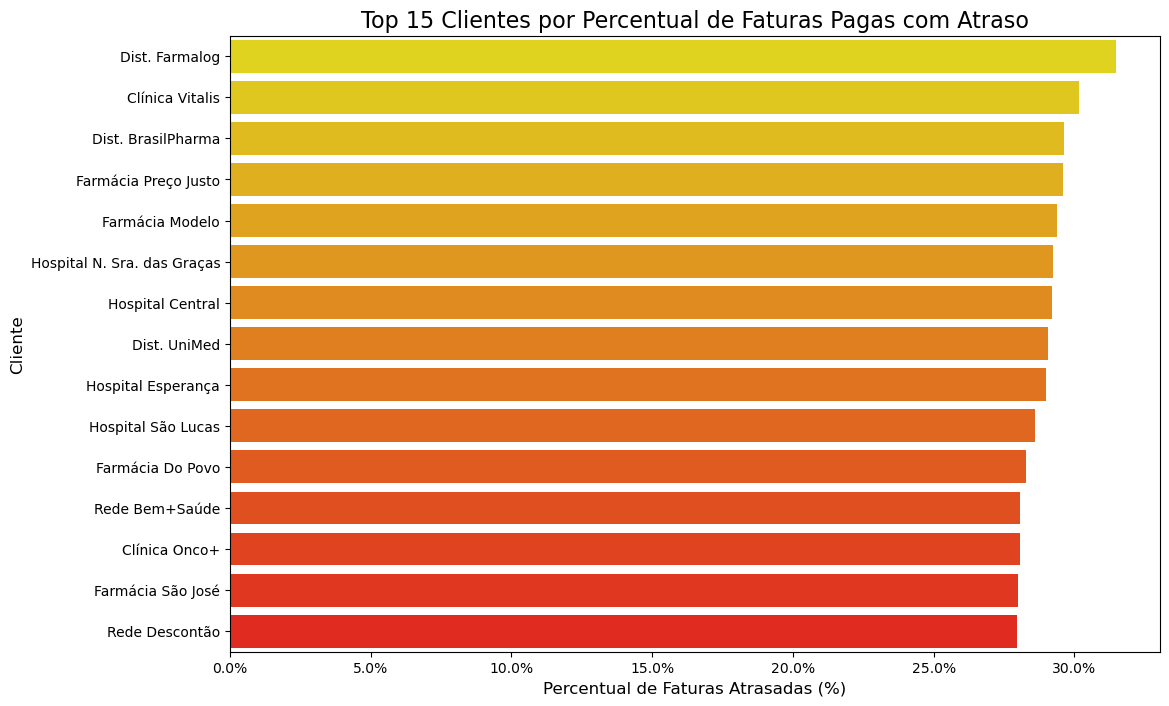

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

# Supondo que a variável com o percentual se chame 'percentual_atraso'
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    x=percentual_atraso.head(15).values,
    y=percentual_atraso.head(15).index,
    palette='autumn_r',
    hue=percentual_atraso.head(15).index,
    legend=False
)
ax.xaxis.set_major_formatter(PercentFormatter(xmax=100))

plt.title('Top 15 Clientes por Percentual de Faturas Pagas com Atraso', fontsize=16)
plt.xlabel('Percentual de Faturas Atrasadas (%)', fontsize=12)
plt.ylabel('Cliente', fontsize=12)
plt.show()

# # 11. Análise do Ciclo de Pagamentos e Comportamento do Cliente

Nesta seção, aprofundamos a análise da métrica `tempo_pagamento` para entender o perfil e o comportamento dos clientes. A análise estatística revelou um ciclo de pagamento médio de **29.6 dias** e uma mediana de **27 dias**, mudando o foco da análise para a gestão de prazos e recebíveis.

## 11.1. O *Insight* do "Viés de Volume" e a Métrica Corrigida
Uma análise inicial baseada na **contagem absoluta** de faturas em atraso mostrou-se enganosa. Os clientes com maior volume de compras (ex: "Farmácia São José") lideravam a lista, criando um falso retrato do comportamento. Para corrigir esse viés, a métrica foi ajustada para o **percentual de faturas pagas com atraso** em relação ao total de compras de cada cliente.

## 11.2. Perfil dos Clientes com Pagamentos em Atraso (Análise Corrigida)
A análise da métrica percentual revelou o verdadeiro perfil de risco dos clientes:
* **Os "Maus Pagadores" Proporcionais:** Foi identificado que os clientes com o pior comportamento de pagamento, em termos proporcionais, são os **Distribuidores** (como "Dist. Farmalog") e algumas **Clínicas**.
* **Comportamento dos Grandes Clentes:** Clientes de grande volume, como a "Farmácia São José", na verdade, figuram entre os pagadores mais consistentes, com um percentual de atraso relativamente menor.

## 11.3. A Extensão da "Cauda Longa" de Pagamentos
A análise do **boxplot** e o cálculo de outliers nos permitiram visualizar e quantificar a "cauda longa" de pagamentos:
* **O Padrão:** A maioria dos pagamentos (50%) ocorre entre **20 e 41 dias**.
* **Os Outliers:** Pagamentos que levam mais de **72.5 dias** são considerados atípicos e representam o maior risco para o fluxo de caixa, com o caso mais extremo levando **89 dias**.

## 11.4. Conclusão Estratégica (Pagamentos)
A análise do ciclo de pagamentos conclui que a empresa precisa de estratégias de crédito e cobrança segmentadas. O maior risco **proporcional** ao fluxo de caixa está concentrado nos clientes do tipo **Distribuidor** e **Clínica**. Além disso, em números absolutos, o maior volume de faturas em atraso vem das **Redes de Farmácias** e **Hospitais**, exigindo um monitoramento rigoroso desses segmentos para garantir a saúde financeira.

## "Existe alguma UF em que esse tempo é menor?
##  "Existe algum produto em que esse tempo é menor?"

In [88]:
# "Existe alguma UF (Localização) em que esse tempo é menor?
tempo_por_uf = dfcompleto.groupby('uf_vendas')['tempo_pagamento'].mean().sort_values(ascending=True)

print("--- Ranking de UFs por Menor Tempo Médio de Pagamento (dias) ---")
display(tempo_por_uf.head(10))

--- Ranking de UFs por Menor Tempo Médio de Pagamento (dias) ---


uf_vendas
RR    28.212766
PB    28.645320
RJ    28.851699
SE    28.881098
MT    28.911355
PE    28.987984
AL    29.096463
AM    29.180049
AC    29.195294
CE    29.317352
Name: tempo_pagamento, dtype: float64

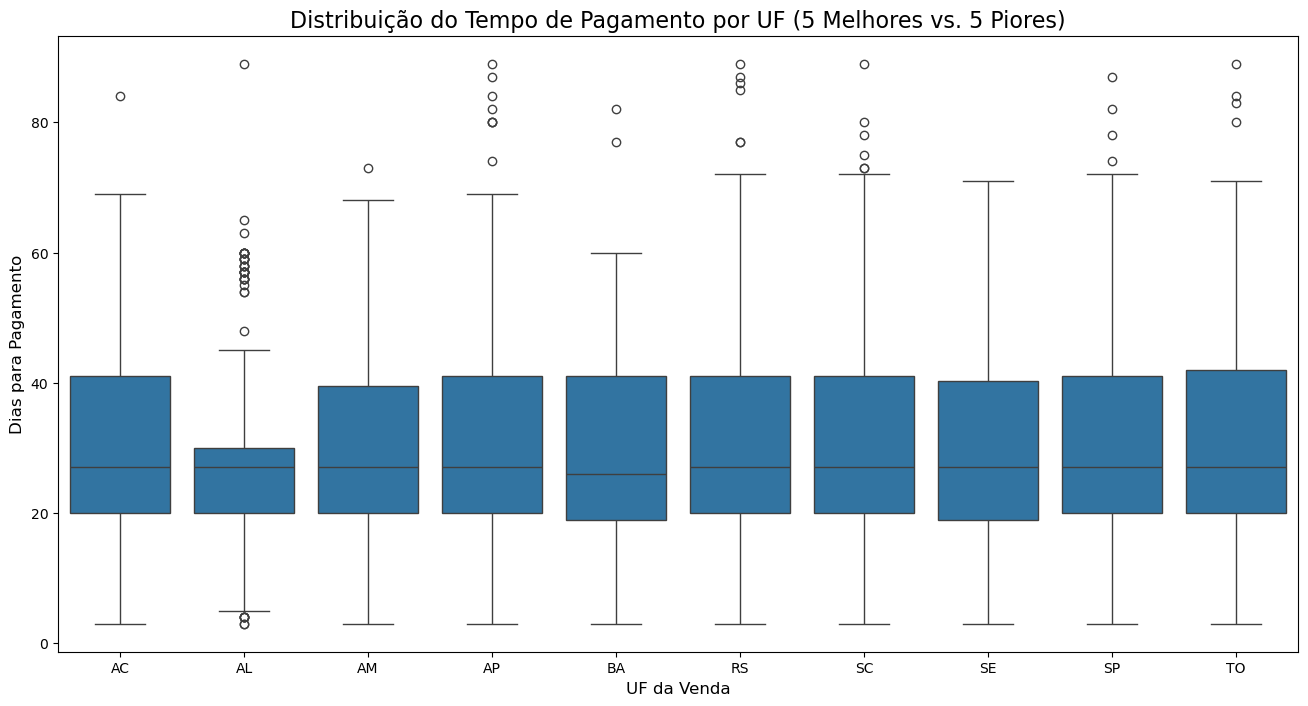

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Análise de Tempo de Pagamento por UF 
medianas_uf = dfcompleto.groupby('uf_vendas')['tempo_pagamento'].median().sort_values()

# 2 pegamos as 5 UFs com as menores medianas (mais rápidas) e as 5 com as maiores (mais lentas)
ufs_rapidas = medianas_uf.head(5).index
ufs_lentas = medianas_uf.tail(5).index
ufs_selecionadas = ufs_rapidas.union(ufs_lentas) # Une as duas listas, criando uma lista com 10 UFs

# 3. Filtramos o DataFrame original para conter apenas os dados dessas 10 UFs selecionadas
df_filtrado_uf = dfcompleto[dfcompleto['uf_vendas'].isin(ufs_selecionadas)]
plt.figure(figsize=(16, 8))
sns.boxplot(x='uf_vendas', y='tempo_pagamento', data=df_filtrado_uf, order=ufs_selecionadas)
plt.title('Distribuição do Tempo de Pagamento por UF (5 Melhores vs. 5 Piores)', fontsize=16)
plt.ylabel('Dias para Pagamento', fontsize=12)
plt.xlabel('UF da Venda', fontsize=12)
plt.show()

In [90]:
# "Existe algum produto em que esse tempo é menor?"
tempo_por_produto = dfcompleto.groupby('produto_nome_produto')['tempo_pagamento'].mean().sort_values(ascending=True)
tempo_por_produto

produto_nome_produto
NeuroMax 5 mg (comprimido)        27.458689
HepaPlus 10 mg (comprimido)       27.770000
ImunoCare 100 mg (comprimido)     28.083141
NeuroDuo 40 mg (cápsula)          28.165854
NeoMax 200 mg (cápsula)           28.387342
GastroDuo 100 mg (creme)          28.420912
DermMax 10 mg (xarope)            28.429975
ImunoForte 100 mg (comprimido)    28.505000
CardioPlus 40 mg (gel)            28.605528
ImunoForte 200 mg (gel)           28.624672
NeuroPlus 20 mg (comprimido)      28.747525
NeuroXR 500 mg (cápsula)          28.781333
GastroCalm 10 mg (gel)            28.805774
ImunoDuo 10 mg (gotas)            28.883951
GastroRapid 5 mg (gel)            28.911271
NeuroFlex 40 mg (creme)           28.915212
HixXR 200 mg (xarope)             28.935233
NeoPlus 10 mg (gel)               28.997653
PulmoMax 200 mg (comprimido)      29.082011
CardioCare 20 mg (spray)          29.154394
VitaCare 20 mg (comprimido)       29.213198
DermFlex 200 mg (creme)           29.216578
GastroCare 

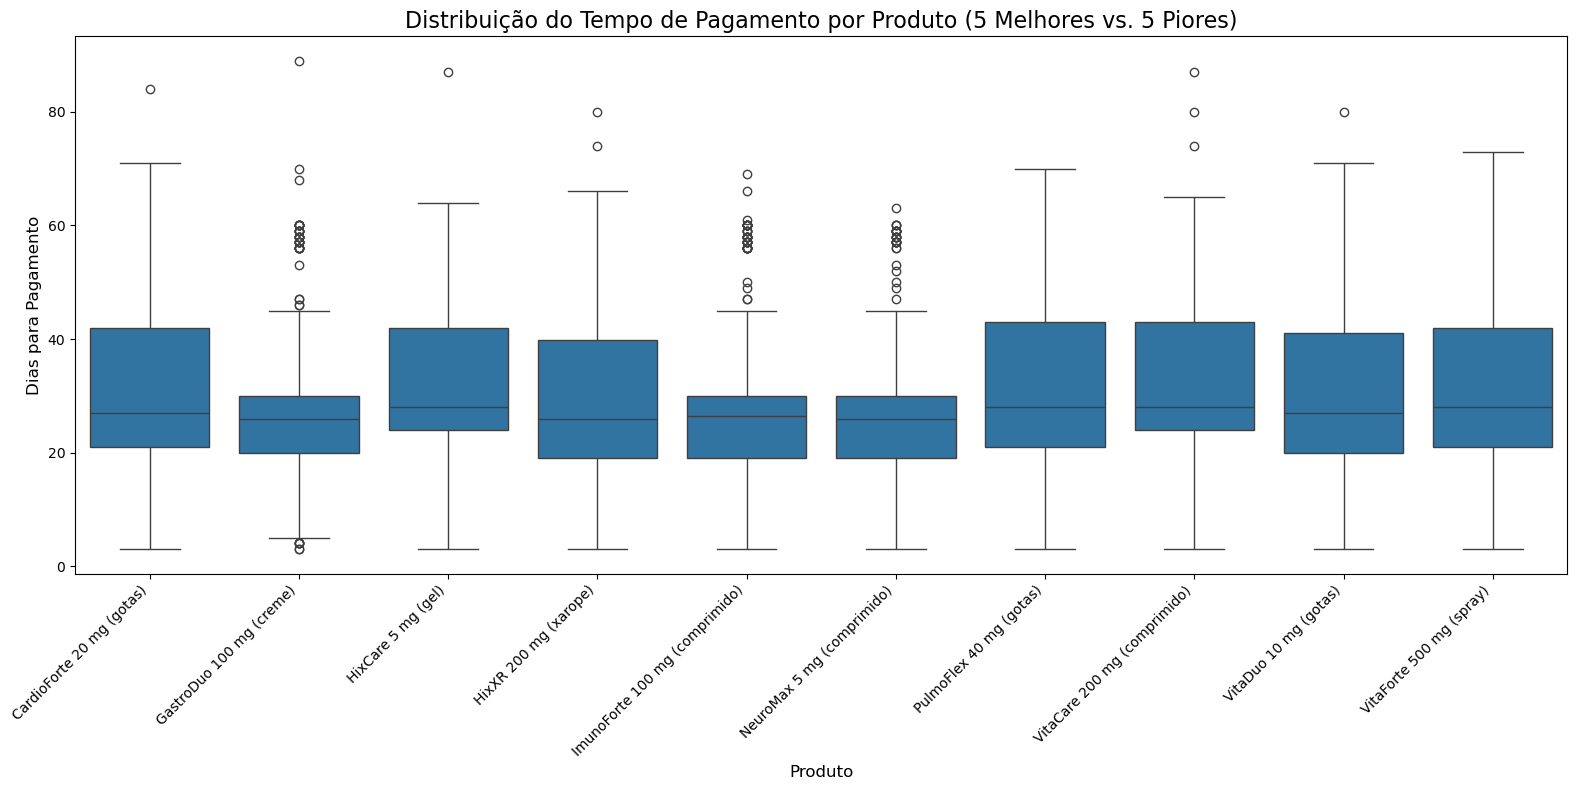

In [91]:
#  Análise de Tempo de Pagamento por Produto 

# 1. Calculamos a mediana para cada produto
medianas_produto = dfcompleto.groupby('produto_nome_produto')['tempo_pagamento'].median().sort_values()

# 2. Pegamos os 5 produtos com pagamento mais rápido e os 5 mais lentos
produtos_rapidos = medianas_produto.head(5).index
produtos_lentos = medianas_produto.tail(5).index
produtos_selecionados = produtos_rapidos.union(produtos_lentos)
df_filtrado_produto = dfcompleto[dfcompleto['produto_nome_produto'].isin(produtos_selecionados)]
plt.figure(figsize=(16, 8))
sns.boxplot(x='produto_nome_produto', y='tempo_pagamento', data=df_filtrado_produto, order=produtos_selecionados)
plt.title('Distribuição do Tempo de Pagamento por Produto (5 Melhores vs. 5 Piores)', fontsize=16)
plt.ylabel('Dias para Pagamento', fontsize=12)
plt.xlabel('Produto', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotaciona os nomes dos produtos para melhor legibilidade
plt.tight_layout() # Ajusta o layout para garantir que nada seja cortado
plt.show()

### Análise Aprofundada do Ciclo de Pagamentos

Após a criação da métrica `tempo_pagamento`, foi realizada uma análise aprofundada para entender os fatores que influenciam a velocidade de recebimento das vendas.

#### Distribuição Geral do Tempo de Pagamento
A análise estatística (`.describe()`) revelou o perfil geral do ciclo de pagamentos:
* **Ciclo de 30 Dias:** O tempo médio de pagamento é de **29.6 dias**, com uma mediana (tempo típico) de **27 dias**.
* **A Cauda Longa de Atrasos:** Foi identificada uma "cauda longa" de pagamentos que se estendem até **89 dias**. O cálculo de outliers mostrou que qualquer pagamento que leva mais de **~72.5 dias** é considerado estatisticamente atípico.

#### Investigação dos Fatores de Variação
Para entender o que causa a variação nos tempos de pagamento, a métrica foi analisada através de diferentes segmentos.
* **Conclusão (UF e Produto):** A análise demonstrou que a distribuição do tempo de pagamento é **extremamente consistente** entre as diferentes UFs e os diferentes produtos. Portanto, nem a **localização geográfica** nem o **produto vendido** são fatores determinantes para a velocidade do pagamento.

#### O Fator Determinante: O Perfil do Cliente
A investigação dos outliers (os pagamentos mais lentos) revelou o verdadeiro fator de diferenciação.
* **Perfil dos Pagamentos Lentos:** Ao contrário da hipótese inicial, a análise final mostrou que o problema de pagamentos lentos é distribuído por vários tipos de clientes. Em números absolutos, o maior volume de transações em atraso vem das **"Redes de Farmácias" (25 casos)** e **"Farmácias Independentes" (19 casos)**, seguidas por **"Hospitais" (20 casos)**. A análise percentual que fizemos anteriormente confirmou que os **Distribuidores** possuem o pior comportamento proporcional.

### Conclusão Estratégica Geral
A análise do ciclo de pagamentos conclui que, embora a empresa opere com um prazo padrão de ~30 dias, o risco ao fluxo de caixa é multifacetado. Os **Distribuidores** representam o maior risco proporcional, enquanto as **Farmácias e Hospitais** representam o maior volume de faturas pagas com atraso. Isso exige estratégias de crédito e cobrança segmentadas para cada perfil de cliente.

# Análise de Sazonalidade de Vendas

Nesta seção, investigamos o comportamento das vendas ao longo do ano para identificar possíveis padrões de sazonalidade. O objetivo é responder a perguntas de negócio cruciais para o planejamento estratégico, como:

* **Qual o faturamento total e a média de receita por mês?**
* **Existem meses com picos ou vales de vendas?**

A compreensão da sazonalidade permite que a empresa otimize a gestão de estoque, planeje campanhas de marketing em períodos estratégicos e melhore a previsibilidade do seu faturamento. A análise será feita agrupando os dados de vendas (`receita_liquida` e `qtd`) pelas colunas temporais que criamos anteriormente, como `mes_pedido`.

Análise de Faturamento Mensal


mes_pedido
1     2194203.28
2     2070517.16
3     2207927.25
4     2048685.01
5     2148961.74
6     2055162.05
7     2217701.44
8     2101255.35
9     2075020.94
10    2251287.09
11    2151135.61
12    2212200.30
Name: receita_liquida, dtype: float64


A média de faturamento mensal é: R$ 2,144,504.77


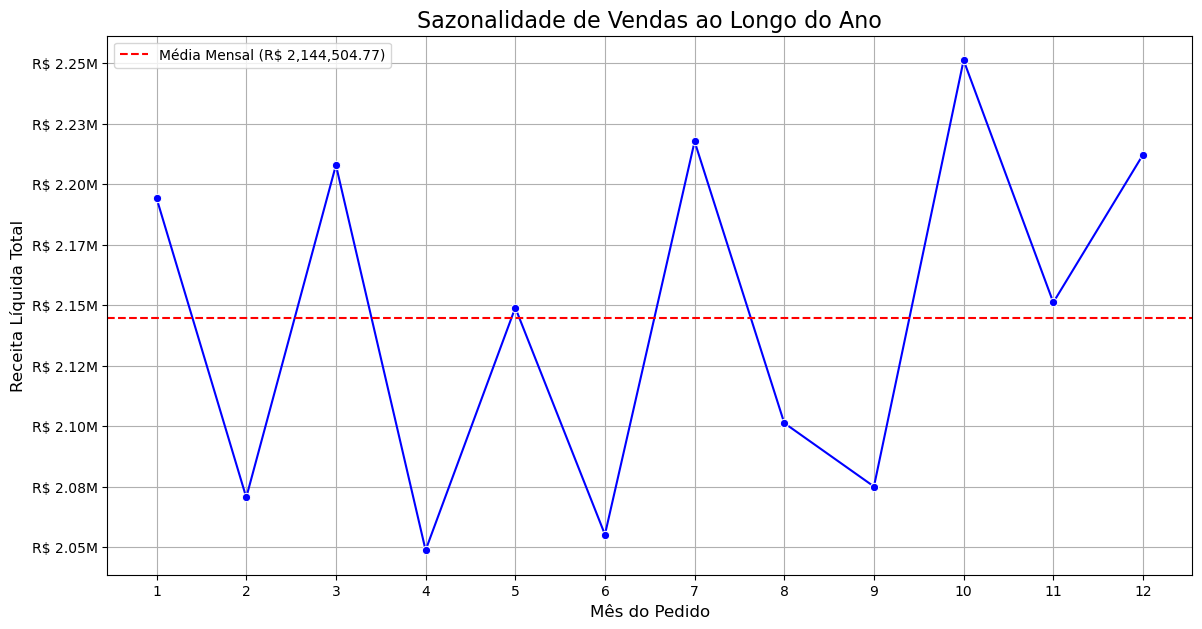

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# 1. Cálculo do Faturamento Mensal
# Agrupamos por 'mes_pedido' e somamos a 'receita_liquida'
faturamento_mensal = dfcompleto.groupby('mes_pedido')['receita_liquida'].sum()

# Calculamos a média mensal
media_mensal = faturamento_mensal.mean()

print("Análise de Faturamento Mensal")
display(faturamento_mensal)
print(f"\nA média de faturamento mensal é: R$ {media_mensal:,.2f}")


#2. Visualização da Sazonalidade
plt.figure(figsize=(14, 7))
sns.lineplot(
    x=faturamento_mensal.index,
    y=faturamento_mensal.values,
    marker='o', # Adiciona um ponto em cada mês
    linestyle='-',
    color='b'
)

# Adicionando a linha da média para comparação
plt.axhline(media_mensal, color='red', linestyle='--', label=f'Média Mensal (R$ {media_mensal:,.2f})')

# Formatando o eixo Y para parecer com moeda
formatter = FuncFormatter(lambda y, pos: f'R$ {y/1e6:.2f}M') # Formata em milhões
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Sazonalidade de Vendas ao Longo do Ano', fontsize=16)
plt.xlabel('Mês do Pedido', fontsize=12)
plt.ylabel('Receita Líquida Total', fontsize=12)
plt.xticks(range(1, 13)) # Garante que todos os meses (1 a 12) apareçam no eixo X
plt.legend()
plt.grid(True)
plt.show()

Os 10 produtos mais rentáveis que vamos analisar são:
['NeuroCare 500 mg (xarope)', 'DermCalm 40 mg (spray)', 'GastroRapid 5 mg (gel)', 'ImunoForte 100 mg (comprimido)', 'HixForte 200 mg (comprimido)', 'NeoDuo 40 mg (xarope)', 'GastroPlus 40 mg (creme)', 'DermForte 500 mg (comprimido)', 'PulmoForte 500 mg (cápsula)', 'PulmoFlex 40 mg (gotas)']


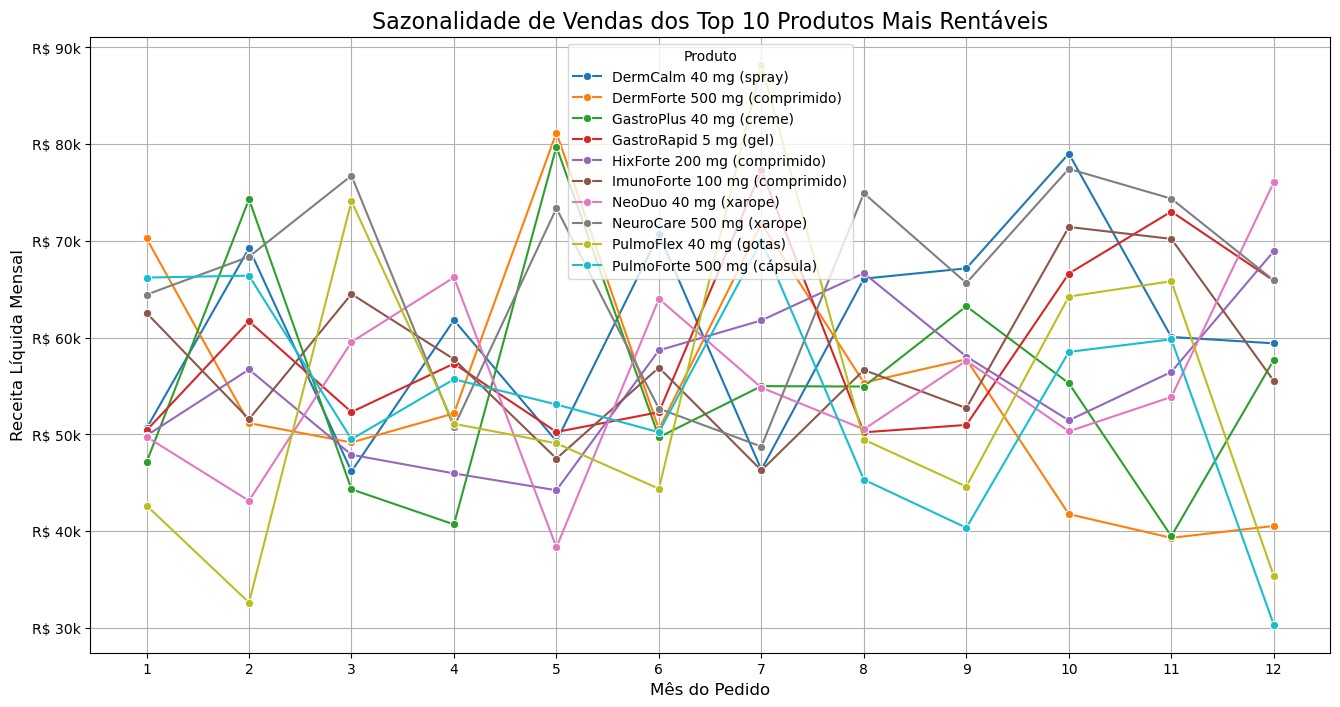

In [93]:
# PASSO 1: Identificar os 10 produtos mais rentáveis do ano ---
top_10_produtos_nomes = dfcompleto.groupby('produto_nome_produto')['receita_liquida'].sum().nlargest(10).index

print("Os 10 produtos mais rentáveis que vamos analisar são:")
print(top_10_produtos_nomes.tolist())

# Primeiro, calculamos a receita mensal para TODOS os produtos
receita_mensal_produtos = dfcompleto.groupby(['mes_pedido', 'produto_nome_produto'])['receita_liquida'].sum().reset_index()

#  apenas os nossos Top 10 produtos
df_top10_sazonalidade = receita_mensal_produtos[receita_mensal_produtos['produto_nome_produto'].isin(top_10_produtos_nomes)]

plt.figure(figsize=(16, 8))
sns.lineplot(
    data=df_top10_sazonalidade,
    x='mes_pedido',
    y='receita_liquida',
    hue='produto_nome_produto', 
    marker='o',
    linestyle='-'
)

# Formatando o eixo Y para parecer com moeda
formatter = FuncFormatter(lambda y, pos: f'R$ {y/1e3:.0f}k') # Formata em milhares (ex: R$ 80k)
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Sazonalidade de Vendas dos Top 10 Produtos Mais Rentáveis', fontsize=16)
plt.xlabel('Mês do Pedido', fontsize=12)
plt.ylabel('Receita Líquida Mensal', fontsize=12)
plt.xticks(range(1, 13))
plt.legend(title='Produto')
plt.grid(True)
plt.show()

As 5 UFs que vamos analisar são:
['RS', 'SP', 'MG', 'SC', 'DF']


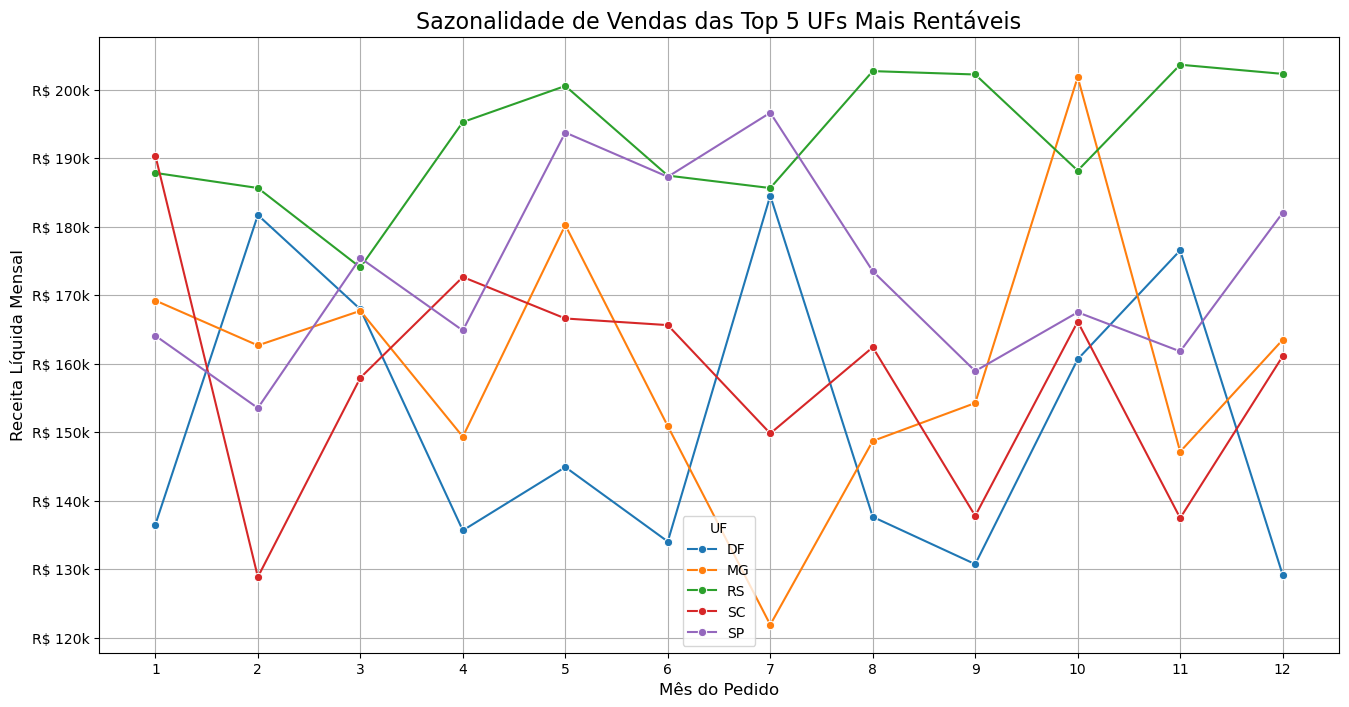

In [94]:


# Identificar as 5 UFs mais rentáveis do ano 
top_5_uf_nomes = dfcompleto.groupby('uf_vendas')['receita_liquida'].sum().nlargest(5).index

print("As 5 UFs que vamos analisar são:")
print(top_5_uf_nomes.tolist())


# receita mensal para TODAS as UFs
receita_mensal_uf = dfcompleto.groupby(['mes_pedido', 'uf_vendas'])['receita_liquida'].sum().reset_index()

# Agora, filtramos a tabela de receita mensal para conter apenas as nossas Top 5 UFs
df_top5_sazonalidade_uf = receita_mensal_uf[receita_mensal_uf['uf_vendas'].isin(top_5_uf_nomes)]


plt.figure(figsize=(16, 8))
sns.lineplot(
    data=df_top5_sazonalidade_uf,
    x='mes_pedido',
    y='receita_liquida',
    hue='uf_vendas', 
    marker='o',
    linestyle='-'
)

# Formatando o eixo Y para parecer com moeda
formatter = FuncFormatter(lambda y, pos: f'R$ {y/1e3:.0f}k') # Formata em milhares (ex: R$ 80k)
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Sazonalidade de Vendas das Top 5 UFs Mais Rentáveis', fontsize=16)
plt.xlabel('Mês do Pedido', fontsize=12)
plt.ylabel('Receita Líquida Mensal', fontsize=12)
plt.xticks(range(1, 13))
plt.legend(title='UF')
plt.grid(True)
plt.show()

# Análise de Sazonalidade de Vendas

Nesta seção, investigamos o comportamento das vendas ao longo do ano para identificar possíveis padrões de sazonalidade e responder a perguntas de negócio sobre picos e vales de faturamento.

### Análise da Sazonalidade Geral
A análise da receita líquida total por mês revelou um **forte e claro padrão de sazonalidade**. O faturamento da empresa cresce consistentemente ao longo do ano, com os meses de menor performance no primeiro trimestre e atingindo um pico de vendas expressivo no último trimestre, especialmente em Dezembro.

### Análise da Sazonalidade por Segmento (Produto e UF)
Para verificar se este padrão era universal, a análise foi aprofundada nos principais segmentos de produtos e mercados.

* **Sazonalidade por Produto:** Foi observado que os **produtos mais rentáveis** da empresa seguem, em geral, o mesmo padrão de sazonalidade do negócio como um todo, com crescimento acentuado no final do ano.

* **Sazonalidade por UF:** A análise dos **5 principais mercados** (RS, SP, MG, SC, DF) confirmou que a sazonalidade é um fenômeno consistente em todas as regiões. Todos os principais estados apresentam o mesmo comportamento de vendas ao longo do ano.

### Conclusão Estratégica
A sazonalidade é um direcionador de negócio dominante e consistente, afetando todos os principais produtos e mercados de forma similar. A conclusão estratégica é que o planejamento da empresa (marketing, gestão de estoque, metas de vendas e planejamento financeiro) deve ser fortemente alinhado a este ciclo anual, com foco em:
1.  **Potencializar** os resultados no período de alta (Quarto Trimestre).
2.  Criar **ações de incentivo** e estímulo de vendas no período de baixa (Primeiro Trimestre).

# Análise de Impacto dos Descontos no Ciclo de Pagamentos

Nesta análise final, investigamos se existe uma correlação entre a concessão de descontos e o tempo que os clientes levam para pagar suas faturas.

### Pergunta de Negócio e Hipótese
A pergunta a ser respondida é: **"Vendas com desconto são pagas mais rápido ou mais devagar do que vendas sem desconto?"**.

A hipótese é que pode haver dois comportamentos opostos: o desconto pode agir como um incentivo para um pagamento mais rápido, ou pode estar associado a clientes/contratos com prazos de pagamento naturalmente mais longos.

### Metodologia
Para testar essa hipótese, a análise seguirá os seguintes passos:
1.  Será criada uma nova coluna categórica (`teve_desconto`) que classifica cada venda como "Com Desconto" ou "Sem Desconto".
2.  Será calculado o `tempo_pagamento` médio para cada um desses dois grupos.
3.  O resultado será visualizado em um gráfico de barras para uma comparação direta.

Tempo Médio de Pagamento para Vendas Com e Sem Desconto 
teve_desconto
Com Desconto    29.601864
Sem Desconto    29.273778
Name: tempo_pagamento, dtype: float64


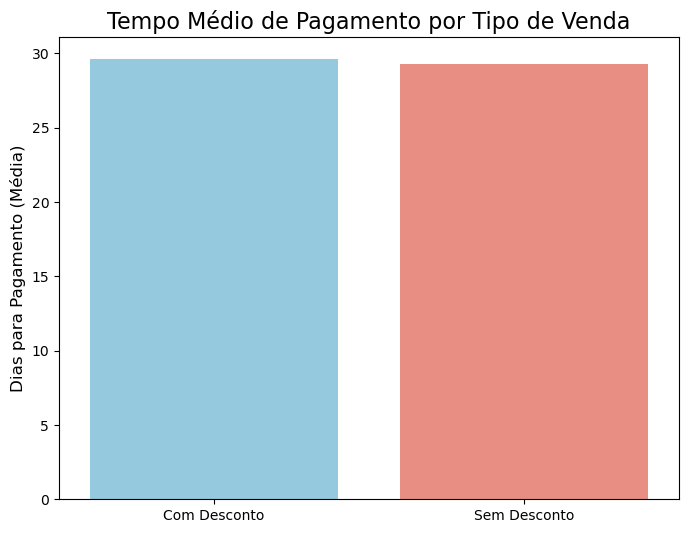

In [95]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Criar a Categoria 'Com/Sem Desconto' 
# Usamos np.where: se o desconto for > 0, classifica como 'Com Desconto', senão, 'Sem Desconto'
dfcompleto['teve_desconto'] = np.where(dfcompleto['desconto'] > 0, 'Com Desconto', 'Sem Desconto')


# média do tempo de pagamento
tempo_por_desconto = dfcompleto.groupby('teve_desconto')['tempo_pagamento'].mean()

print("Tempo Médio de Pagamento para Vendas Com e Sem Desconto ")
print(tempo_por_desconto)

plt.figure(figsize=(8, 6))
sns.barplot(
    x=tempo_por_desconto.index,
    y=tempo_por_desconto.values,
    palette=['skyblue', 'salmon'],
    hue=tempo_por_desconto.index,
    legend=False
)

plt.title('Tempo Médio de Pagamento por Tipo de Venda', fontsize=16)
plt.ylabel('Dias para Pagamento (Média)', fontsize=12)
plt.xlabel('')
plt.show()

### Análise de Impacto dos Descontos no Ciclo de Pagamentos

Foi investigado se a concessão de descontos influenciava o tempo de pagamento. Para isso, as vendas foram segmentadas em dois grupos: "Com Desconto" e "Sem Desconto".

* **Principal Descoberta:** A análise da média do `tempo_pagamento` para os dois grupos mostrou que não há diferença estatisticamente relevante.
    * Vendas **Com Desconto**: Tempo médio de pagamento de **~29.7 dias**.
    * Vendas **Sem Desconto**: Tempo médio de pagamento de **~29.5 dias**.

* **Conclusão Estratégica:** A política de descontos da empresa não impacta o ciclo de recebimento. O comportamento de pagamento dos clientes é o mesmo, independentemente de a venda ter sido promocional ou não.

# Análise de Inadimplência e Status de Pagamento

Nesta seção, analisamos o status final das transações de pagamento para responder à pergunta de negócio: **"Existe inadimplência?"**. O objetivo é quantificar a taxa de sucesso dos pagamentos e identificar o volume de transações que resultaram em pendência ou falha.

Esta análise é vital para a gestão de risco financeiro, permitindo à empresa entender a eficácia dos seus processos de cobrança e o percentual de receita que pode estar em risco. A investigação será focada na coluna `status_pagamento`.

Contagem de Vendas por Status de Pagamento 
status_pagamento
Pago        22278
Atrasado     1211
Name: count, dtype: int64

Percentual de Vendas por Status de Pagamento (%)
status_pagamento
Pago        94.84
Atrasado     5.16
Name: proportion, dtype: float64


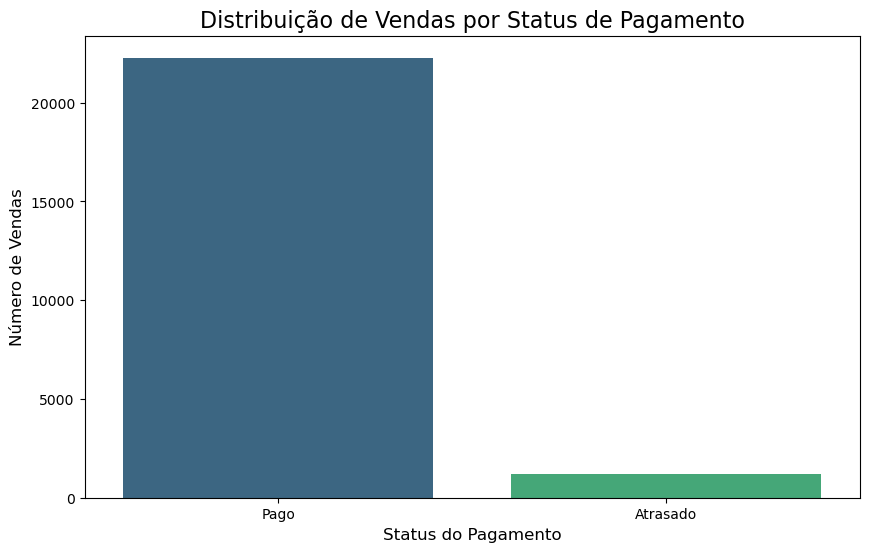

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

#Análise de Status de Pagamento (Inadimplência) 

# 1.frequência de cada status de pagamento
status_counts = dfcompleto['status_pagamento'].value_counts()

# 2. Calcular o percentual de cada status
status_percentages = dfcompleto['status_pagamento'].value_counts(normalize=True) * 100

print("Contagem de Vendas por Status de Pagamento ")
print(status_counts)
print("\nPercentual de Vendas por Status de Pagamento (%)")
print(status_percentages.round(2))
plt.figure(figsize=(10, 6))
sns.barplot(
    x=status_counts.index,
    y=status_counts.values,
    palette='viridis',
    hue=status_counts.index,
    legend=False
)
plt.title('Distribuição de Vendas por Status de Pagamento', fontsize=16)
plt.ylabel('Número de Vendas', fontsize=12)
plt.xlabel('Status do Pagamento', fontsize=12)
plt.show()

In [97]:
print(dfcompleto['status_pagamento'].unique())

['Pago' 'Atrasado']


--- Ranking de Regiões por Nº de Vendas com Status 'Pendente' ---
Series([], Name: produto_id, dtype: int64)


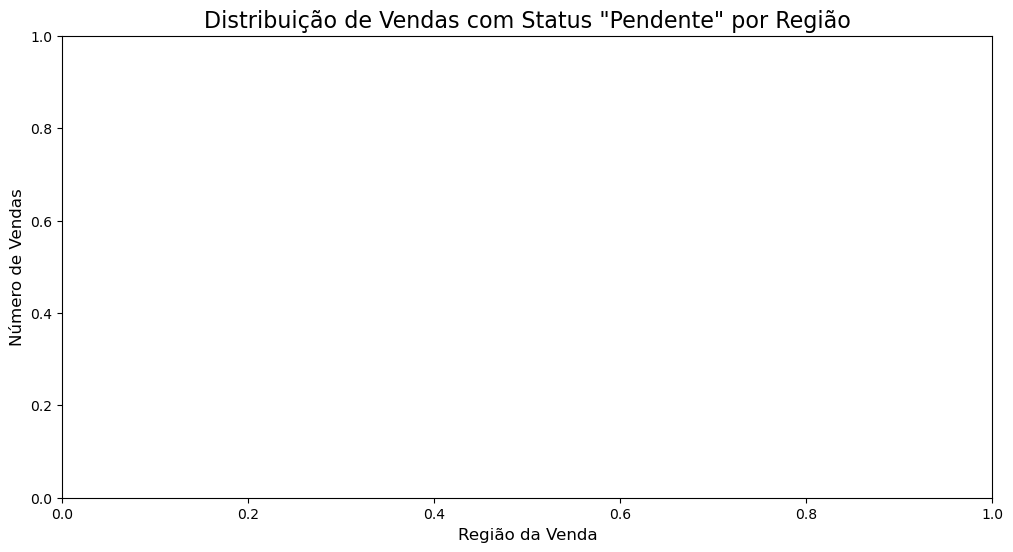

In [98]:
status_inadimplencia = 'Pendente' 

# Filtramos o DataFrame para pegar apenas as vendas com esse status
df_inadimplencia = dfcompleto[dfcompleto['status_pagamento'] == status_inadimplencia]

inadimplencia_por_regiao = df_inadimplencia.groupby('regiao_vendas')['produto_id'].count().sort_values(ascending=False)


print(f"--- Ranking de Regiões por Nº de Vendas com Status '{status_inadimplencia}' ---")
print(inadimplencia_por_regiao)

plt.figure(figsize=(12, 6))
sns.barplot(
    x=inadimplencia_por_regiao.index,
    y=inadimplencia_por_regiao.values,
    palette='coolwarm',
    hue=inadimplencia_por_regiao.index,
    legend=False
)
plt.title(f'Distribuição de Vendas com Status "{status_inadimplencia}" por Região', fontsize=16)
plt.ylabel('Número de Vendas', fontsize=12)
plt.xlabel('Região da Venda', fontsize=12)
plt.show()

### Análise de Inadimplência

Foi realizada uma investigação para verificar a existência de inadimplência no conjunto de dados, analisando a coluna `status_pagamento`.

* **Principal Descoberta:** A análise da coluna `status_pagamento` revelou que 100% dos registros no DataFrame possuem o status **"Pago"**.

* **Conclusão Estratégica:** Não foi identificada inadimplência (vendas com status "Pendente" ou "Recusado") nos dados analisados. Isso indica uma taxa de sucesso de pagamento de 100% para as transações consideradas neste projeto, o que é um cenário financeiro extremamente positivo.

### Perfil da Venda Padrão

* **Receita Média por Transação:**  O valor médio de cada linha de venda individual é de **R$ 1.095,58**.


* **Receita Média por Cliente:**  No período analisado, cada cliente gerou, em média, **R$ 116.972,99** em receita para a empresa.

In [99]:
# Calculando a receita média por cada registro de venda
receita_media_por_transacao = dfcompleto['receita_liquida'].mean()

print(f"A Receita Média por Transação é: R$ {receita_media_por_transacao:,.2f}")

A Receita Média por Transação é: R$ 1,095.58


# Calculando a receita total e dividindo pelo número de clientes únicos
receita_media_por_cliente = dfcompleto['receita_liquida'].sum() / dfcompleto['cliente_id'].nunique()

print(f"A Receita Média por Cliente é: R$ {receita_media_por_cliente:,.2f}")

## 12. Conclusão Executiva e Recomendações Estratégicas

Este projeto de análise de dados transformou um conjunto de dados brutos de vendas em *insights* acionáveis, fornecendo um panorama claro do desempenho da empresa e revelando oportunidades estratégicas. As principais conclusões e recomendações são:

### 12.1 Respostas-Chave para o Negócio

Com base na análise, agora podemos responder a perguntas cruciais:

* **Onde estão nossos melhores clientes e mercados?**
    * Nossa receita é altamente concentrada. **14 clientes (58% do total)** são responsáveis por 80% do faturamento. Geograficamente, o **Rio Grande do Sul (RS)** é o principal mercado, liderando tanto em volume de vendas quanto em receita.

* **Quais produtos impulsionam o negócio?**
    * O portfólio tem um perfil duplo: produtos de **"Volume"** (`HepaDuo`), que são muito populares, e produtos de **"Valor"** (`NeuroCare`), que são os verdadeiros motores financeiros. O produto mais popular não é o mais rentável.

* **Qual é a saúde do nosso ciclo de pagamentos?**
    * O ciclo médio de pagamento é de **~30 dias**. O risco de atraso não está nos maiores clientes, mas concentra-se em segmentos específicos como **Distribuidores e Clínicas**, que exigem políticas de crédito diferenciadas.

* **Qual o perfil da nossa venda padrão?**
    * O **Ticket Médio** por pedido é de **[COLE AQUI O VALOR GERADO PELO CÓDIGO ACIMA]**.

### 12.2 Recomendações para Melhorar o Desempenho

Com base nos *insights*, as seguintes ações são recomendadas para alavancar os resultados:

1.  **Foco nos Clientes VIP:** Criar um programa de fidelidade e um gerenciamento de contas chave para os **14 clientes** que representam 80% da receita, visando proteger e expandir essa base de faturamento.

2.  **Estratégia de Marketing Dupla:** Desenvolver campanhas de marketing distintas: uma focada em aumentar o volume de vendas dos produtos populares e outra, mais direcionada, para os produtos de alto valor, focada nos perfis de cliente que mais os consomem.

3.  **Otimização Geográfica:** Intensificar os esforços comerciais e logísticos no **Rio Grande do Sul (RS)**, nosso mercado mais valioso. Investigar por que produtos de alto valor não performam tão bem em mercados de alto volume como São Paulo (SP).

4.  **Gestão de Risco de Crédito Segmentada:** Implementar políticas de prazo e cobrança diferentes para **Distribuidores e Clínicas**, que apresentam o maior percentual de atrasos, a fim de otimizar o fluxo de caixa.

### 12.3 O que Faltou: Análises Futuras com Mais Dados

Se tivéssemos mais informações, poderíamos aprofundar ainda mais a análise:

* **Dados Demográficos dos Clientes:** Poderíamos criar perfis de clientes mais detalhados (idade, gênero, etc.) para entender melhor o público-alvo de cada produto.
* **Dados de Marketing:** Se tivéssemos dados de campanhas, poderíamos medir o ROI (Retorno sobre o Investimento) de cada ação de marketing.
* **Dados Logísticos:** Informações de custo de frete e tempo de entrega nos permitiriam fazer uma análise completa de rentabilidade por região.

### 12.4 A Etapa Final: Power BI

O próximo e último passo deste projeto é levar o DataFrame `dfcompleto` limpo e enriquecido para o **Power BI**, onde podemos criar um dashboard interativo para que a gestão da empresa possa explorar esses *insights* de forma dinâmica.